# SIMULATED DATA
- getting node text on answer nodes with str matching
- cleaning up
- running ABSA 
- saving to disk: #merged_df_subset_absa.to_csv(f"{path_to_root}/data/simulated/answers_simu_long_merged_nodes_with_absa.csv")

In [22]:
path_to_root = '/work/PernilleHøjlundBrams#8577/NLP_2023_P'

# - Get data in from the two eval runs
import pandas as pd

# Simu 1-160
#SNF_simu.to_csv(f"{path_to_root}/data/simulated/answers/simu_answers_SNF_prompt4.csv") # hvis du skal bruge nodes fuld text, så er det nodes_downsampled.csv
SNF_simu1_160 = pd.read_csv(f"{path_to_root}/data/simulated/answers/simu_answers_SNF_prompt4_all_rows.csv").drop(columns = ['Unnamed: 0'])
SNF_simu1_160

# Simu 161-320
#SNF_simu.to_csv(f"{path_to_root}/data/simulated/answers/simu_answers_SNF_prompt4_161toend.csv")
SNF_simu161_320 = pd.read_csv(f"{path_to_root}/data/simulated/answers/simu_answers_SNF_prompt4_161toend.csv").drop(columns = ['Unnamed: 0'])
SNF_simu161_320

# Concatenate them - to get 320 rows filled in total
concatenated_df = pd.concat([SNF_simu1_160, SNF_simu161_320], ignore_index=True)

# Delete rows with NA in LLMRAG_response
concatenated_df = concatenated_df.dropna(subset=['LLMRAG_response'])
concatenated_df = concatenated_df.reset_index()
concatenated_df = concatenated_df.drop(columns = ['index'])
concatenated_df

,Topic,Q_subcat,Query,LLMRAG_response,node_0,node_1,node_2,node_3,node_4
0,Fitness and Wellness,comparison,What are the differing views on the impact of ...,"\nBased on the context, there are differing vi...",Node ID: 84d6f2bb-cb7f-4e33-a41c-ec2631e7bc84\...,Node ID: ea1c62a5-6a9e-43fc-80f5-13b1a5c78d85\...,Node ID: 46bf6445-3c8e-4022-b1ae-f70245f9a036\...,Node ID: 8636066b-1573-4501-9360-947676240815\...,Node ID: a8888078-7dfc-4aa4-8d37-59973565dee1\...
1,Fitness and Wellness,ambiguous,What impact may AI have on fitness and wellness?,"\nBased on the context, AI has the potential t...",Node ID: d8dc52b3-bf77-4e6b-af30-9d6d890db083\...,Node ID: 54dd72be-7b8e-40ff-9c02-3415e5d4b73f\...,Node ID: 6554974a-2b6a-4fe6-b0e4-391cb1d920b9\...,Node ID: 249b4dc1-4f50-49a3-bd80-fe5992c6cb2a\...,Node ID: 8636066b-1573-4501-9360-947676240815\...
2,Fitness and Wellness,positive,How can AI positively influence fitness and we...,"\nBased on the context, AI can positively infl...",Node ID: 070dfabd-bbb3-41a7-9eb2-ad305652840c\...,Node ID: 183f5ad2-9ecb-44fc-9b49-61806bd4f7aa\...,Node ID: d8dc52b3-bf77-4e6b-af30-9d6d890db083\...,Node ID: 8636066b-1573-4501-9360-947676240815\...,Node ID: 249b4dc1-4f50-49a3-bd80-fe5992c6cb2a\...
3,Fitness and Wellness,negative,How can AI negatively influence fitness and we...,"\nBased on the context, AI can negatively infl...",Node ID: d8dc52b3-bf77-4e6b-af30-9d6d890db083\...,Node ID: 249b4dc1-4f50-49a3-bd80-fe5992c6cb2a\...,Node ID: cb76dcd8-f1a5-4677-b583-0f610fac0788\...,Node ID: 8636066b-1573-4501-9360-947676240815\...,Node ID: 6554974a-2b6a-4fe6-b0e4-391cb1d920b9\...
4,Precision Agriculture,comparison,What are the differing views on the impact of ...,"\nBased on the context, there are several diff...",Node ID: c2fb5b4b-d3f4-4f2b-9883-85c1c6e7f197\...,Node ID: c16c3a74-fb5a-4d21-bbb0-907512099933\...,Node ID: c43e4d23-b9d1-40cb-a3da-2909096f2be3\...,Node ID: c206da57-4b0f-442e-821b-90e210c3ec87\...,Node ID: 017b0bee-b5f5-4d78-bffd-a3841e40bd2c\...
...,...,...,...,...,...,...,...,...,...
315,Hydrology,negative,How can AI negatively influence hydrology?,"\nBased on the context, AI can negatively infl...",Node ID: 79a15d17-f03f-4ffc-8eab-cde35c469995\...,Node ID: f7f1ecd4-b410-46aa-af45-4bcbbf7b491e\...,Node ID: 63676d82-c027-4539-b935-372bc99875ca\...,Node ID: 159322ce-4465-46c9-8e25-040205fc1dda\...,Node ID: 7f791859-5fb9-4ac2-9edb-e1a68a80af6e\...
316,Robotics,comparison,What are the differing views on the impact of ...,"\nBased on the context, there are several diff...",Node ID: b41c7008-4db2-4945-b08c-71b9a1e04e8c\...,Node ID: 644f2228-e014-4e30-bfff-0727fdc990a9\...,Node ID: 63f73f96-5f78-4920-af65-4625b97668d8\...,Node ID: b7bb83db-cca9-4fa4-bbba-aa07652dfffd\...,Node ID: ec107606-e289-4edb-b044-1806fe108f21\...
317,Robotics,ambiguous,What impact may AI have on robotics?,"\nBased on the context, the integration of Art...",Node ID: b41c7008-4db2-4945-b08c-71b9a1e04e8c\...,Node ID: ec107606-e289-4edb-b044-1806fe108f21\...,Node ID: b7bb83db-cca9-4fa4-bbba-aa07652dfffd\...,Node ID: 63f73f96-5f78-4920-af65-4625b97668d8\...,Node ID: ab03c673-ccc7-4461-b653-c619d4e35145\...
318,Robotics,positive,How can AI positively influence robotics?,"\nBased on the context, AI can positively infl...",Node ID: ddd351a3-b348-4efe-a7f8-827860b0a626\...,Node ID: b41c7008-4db2-4945-b08c-71b9a1e04e8c\...,Node ID: ec107606-e289-4edb-b044-1806fe108f21\...,Node ID: 76e3220b-9c16-49f7-973c-3b559e99f8e0\...,Node ID: c7362a9d-502a-4044-a662-4b2c373c1483\...


In [14]:
import pandas as pd

#  dataframe is named df

# Define the set of required values
required_values = {'comparison', 'ambiguous', 'positive', 'negative'}

# Function to check if all values are present
def check_all_values_present(group):
    return required_values.issubset(set(group['Q_subcat']))

# Group by 'Topic' and apply the check
grouped = concatenated_df.groupby('Topic').apply(check_all_values_present)

# Filter topics that do not have all required 'Q_subcat' values
topics_missing_values = grouped[grouped == False].index.tolist()

# Print the topics missing values
print("Topics missing some 'Q_subcat' values:", topics_missing_values)

# All topics have the four cats

Topics missing some 'Q_subcat' values: []


## Put full nodetext on

In [23]:
# Sometime in the concatenated_df, some newline breaks are in the text... ('Node ID: 84d6f2bb-cb7f-4e33-a41c-ec2631e7bc84\nText: Intensity builds around the integration of Artificial\nIntelligence (AI) i) 
# let's remove them
concatenated_df['node_0'][0]

# Loop over the 'node_x' columns and replace '\n' with an empty string
for i in range(5):  # columns are 'node_0', 'node_1', ..., 'node_4'
    col_name = f'node_{i}'
    concatenated_df[col_name] = concatenated_df[col_name].str.replace('\n', ' ', regex=False)

# Now the DataFrame concatenated_df will have the newline characters removed from the 'node_x' columns
concatenated_df['node_0'][0]

'Node ID: 84d6f2bb-cb7f-4e33-a41c-ec2631e7bc84 Text: Intensity builds around the integration of Artificial Intelligence (AI) in the realm of fitness and wellness, raising concerns among experts and skeptics alike. While enthusiasts claim that AI-powered tools can revolutionize personal health improvement, others are voicing cautionary opinions about potential downtrodden consequences. From imperso... Score:  0.909 '

In [29]:
concatenated_df_long = concatenated_df.melt( # id_vars = cols you want to keep unchanged
                       id_vars=['Q_subcat','Query', 'LLMRAG_response'], 
                       
                       # value_vars = cols you melt to long 
                       value_vars=['node_0', 'node_1', 'node_2', 'node_3', 'node_4'], 

                       # var_name = name of new col containing the *names* of the melted cols
                       var_name='node_number', 
                       
                       # value_name = name of new col containing the *values* of the melted cols
                       value_name='node_content')


# ---- Extract text and append
import pandas as pd
import re

def extract_text_snippet(text):
    # Adjust the regular expression to match text from 'Text:' up to '...'
    match = re.search(r'Text: (.*?)\.\.\.', text, re.DOTALL)
    if match:
        # Extract up to the first 10-15 tokens
        tokens = match.group(1).replace('\n', ' ').split()
        return ' '.join(tokens[:18]) if len(tokens) >= 13 else ' '.join(tokens)
    else:
        return None

# Apply the function to the 'node_content' column
concatenated_df_long['extracted_text'] = concatenated_df_long['node_content'].apply(extract_text_snippet)

# ---- 
import pandas as pd
import re

# Load the nodes DataFrame
# - Get node data in
import pandas as pd
nodes_downsampled = pd.read_csv(f"{path_to_root}/data/simulated/nodes_downsampled.csv").drop(columns = ['Unnamed: 0'])
nodes_downsampled['7'] = nodes_downsampled['7'].astype(str)

matches = []
extracted_texts = []

for snippet in concatenated_df_long['extracted_text']:
    if snippet:
        # Escape regex special characters in the snippet
        escaped_snippet = re.escape(snippet)

        # Check if the snippet is in any 'text' entry of the other DataFrame
        match = nodes_downsampled['7'].str.contains(escaped_snippet, na=False, regex=True)
        matched_nodes = nodes_downsampled[match]

        # Store matches and corresponding extracted text
        if not matched_nodes.empty:
            matches.append(matched_nodes)
            extracted_texts.extend([snippet] * len(matched_nodes))

# Concatenate all matches
all_matches = pd.concat(matches)

# Add a new column for the extracted text
all_matches['extracted_text'] = extracted_texts

all_matches
# Now you can merge df_SNF_long and all_matches on the 'extracted_text' column

# Perform a left merge to keep all rows from df_SNF_long
merged_df = pd.merge(concatenated_df_long, all_matches, on='extracted_text', how='left')
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.reset_index()
merged_df = merged_df.drop(columns = ['index'])
merged_df
#merged_df['7'] = merged_df['7'].astype(str) # was full_node_text before


,Q_subcat,Query,LLMRAG_response,node_number,node_content,extracted_text,0,1,2,3,4,5,6,7,8,9,10,11,12
0,comparison,What are the differing views on the impact of ...,"\nBased on the context, there are differing vi...",node_0,Node ID: 84d6f2bb-cb7f-4e33-a41c-ec2631e7bc84 ...,Intensity builds around the integration of Art...,"('id_', '84d6f2bb-cb7f-4e33-a41c-ec2631e7bc84')","('embedding', None)","('metadata', {'title': 'AI in Fitness and Well...","('excluded_embed_metadata_keys', [])","('excluded_llm_metadata_keys', [])","('relationships', {<NodeRelationship.SOURCE: '...","('hash', 'bea9f3beeeba6553be4ead76f45855aefa1f...","('text', ""Intensity builds around the integrat...","('start_char_idx', 0)","('end_char_idx', 3014)","('text_template', '{metadata_str}\n\n{content}')","('metadata_template', '{key}: {value}')","('metadata_seperator', '\n')"
1,ambiguous,What impact may AI have on fitness and wellness?,"\nBased on the context, AI has the potential t...",node_0,Node ID: d8dc52b3-bf77-4e6b-af30-9d6d890db083 ...,"In recent years, artificial intelligence (AI) ...","('id_', 'd8dc52b3-bf77-4e6b-af30-9d6d890db083')","('embedding', None)","('metadata', {'title': 'AI in Fitness and Well...","('excluded_embed_metadata_keys', [])","('excluded_llm_metadata_keys', [])","('relationships', {<NodeRelationship.SOURCE: '...","('hash', '2d5a858c185291c6552f9c73c9072ba16b0d...","('text', ""In recent years, artificial intellig...","('start_char_idx', 0)","('end_char_idx', 2832)","('text_template', '{metadata_str}\n\n{content}')","('metadata_template', '{key}: {value}')","('metadata_seperator', '\n')"
2,positive,How can AI positively influence fitness and we...,"\nBased on the context, AI can positively infl...",node_0,Node ID: 070dfabd-bbb3-41a7-9eb2-ad305652840c ...,In a fortunate turn of events for fitness enth...,"('id_', '070dfabd-bbb3-41a7-9eb2-ad305652840c')","('embedding', None)","('metadata', {'title': 'AI Revolutionizes Fitn...","('excluded_embed_metadata_keys', [])","('excluded_llm_metadata_keys', [])","('relationships', {<NodeRelationship.SOURCE: '...","('hash', '081c68a20612be46829d75c98b8fd7c08dc1...","('text', ""In a fortunate turn of events for fi...","('start_char_idx', 0)","('end_char_idx', 3043)","('text_template', '{metadata_str}\n\n{content}')","('metadata_template', '{key}: {value}')","('metadata_seperator', '\n')"
3,negative,How can AI negatively influence fitness and we...,"\nBased on the context, AI can negatively infl...",node_0,Node ID: d8dc52b3-bf77-4e6b-af30-9d6d890db083 ...,"In recent years, artificial intelligence (AI) ...","('id_', 'd8dc52b3-bf77-4e6b-af30-9d6d890db083')","('embedding', None)","('metadata', {'title': 'AI in Fitness and Well...","('excluded_embed_metadata_keys', [])","('excluded_llm_metadata_keys', [])","('relationships', {<NodeRelationship.SOURCE: '...","('hash', '2d5a858c185291c6552f9c73c9072ba16b0d...","('text', ""In recent years, artificial intellig...","('start_char_idx', 0)","('end_char_idx', 2832)","('text_template', '{metadata_str}\n\n{content}')","('metadata_template', '{key}: {value}')","('metadata_seperator', '\n')"
4,comparison,What are the differing views on the impact of ...,"\nBased on the context, there are several diff...",node_0,Node ID: c2fb5b4b-d3f4-4f2b-9883-85c1c6e7f197 ...,As the agriculture industry continues to witne...,"('id_', 'c2fb5b4b-d3f4-4f2b-9883-85c1c6e7f197')","('embedding', None)","('metadata', {'title': 'Concerns Grow Over the...","('excluded_embed_metadata_keys', [])","('excluded_llm_metadata_keys', [])","('relationships', {<NodeRelationship.SOURCE: '...","('hash', '54f04bfecc08a19ae7e583da7c1a570cf364...","('text', 'As the agriculture industry continue...","('start_char_idx', 0)","('end_char_idx', 2922)","('text_template', '{metadata_str}\n\n{content}')","('metadata_template', '{key}: {value}')","('metadata_seperator', '\n')"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,negative,How can AI negatively influence hydrology?,"\nBa

In [32]:
rename_dict = {
    '0': 'node_id_from_nodes',
    '2': 'metadata_from_nodes',
    '7': 'article_body_from_nodes'
}

merged_df.rename(columns=rename_dict, inplace=True)
merged_df

,Q_subcat,Query,LLMRAG_response,node_number,node_content,extracted_text,node_id_from_nodes,1,metadata_from_nodes,3,4,5,6,article_body_from_nodes,8,9,10,11,12
0,comparison,What are the differing views on the impact of ...,"\nBased on the context, there are differing vi...",node_0,Node ID: 84d6f2bb-cb7f-4e33-a41c-ec2631e7bc84 ...,Intensity builds around the integration of Art...,"('id_', '84d6f2bb-cb7f-4e33-a41c-ec2631e7bc84')","('embedding', None)","('metadata', {'title': 'AI in Fitness and Well...","('excluded_embed_metadata_keys', [])","('excluded_llm_metadata_keys', [])","('relationships', {<NodeRelationship.SOURCE: '...","('hash', 'bea9f3beeeba6553be4ead76f45855aefa1f...","('text', ""Intensity builds around the integrat...","('start_char_idx', 0)","('end_char_idx', 3014)","('text_template', '{metadata_str}\n\n{content}')","('metadata_template', '{key}: {value}')","('metadata_seperator', '\n')"
1,ambiguous,What impact may AI have on fitness and wellness?,"\nBased on the context, AI has the potential t...",node_0,Node ID: d8dc52b3-bf77-4e6b-af30-9d6d890db083 ...,"In recent years, artificial intelligence (AI) ...","('id_', 'd8dc52b3-bf77-4e6b-af30-9d6d890db083')","('embedding', None)","('metadata', {'title': 'AI in Fitness and Well...","('excluded_embed_metadata_keys', [])","('excluded_llm_metadata_keys', [])","('relationships', {<NodeRelationship.SOURCE: '...","('hash', '2d5a858c185291c6552f9c73c9072ba16b0d...","('text', ""In recent years, artificial intellig...","('start_char_idx', 0)","('end_char_idx', 2832)","('text_template', '{metadata_str}\n\n{content}')","('metadata_template', '{key}: {value}')","('metadata_seperator', '\n')"
2,positive,How can AI positively influence fitness and we...,"\nBased on the context, AI can positively infl...",node_0,Node ID: 070dfabd-bbb3-41a7-9eb2-ad305652840c ...,In a fortunate turn of events for fitness enth...,"('id_', '070dfabd-bbb3-41a7-9eb2-ad305652840c')","('embedding', None)","('metadata', {'title': 'AI Revolutionizes Fitn...","('excluded_embed_metadata_keys', [])","('excluded_llm_metadata_keys', [])","('relationships', {<NodeRelationship.SOURCE: '...","('hash', '081c68a20612be46829d75c98b8fd7c08dc1...","('text', ""In a fortunate turn of events for fi...","('start_char_idx', 0)","('end_char_idx', 3043)","('text_template', '{metadata_str}\n\n{content}')","('metadata_template', '{key}: {value}')","('metadata_seperator', '\n')"
3,negative,How can AI negatively influence fitness and we...,"\nBased on the context, AI can negatively infl...",node_0,Node ID: d8dc52b3-bf77-4e6b-af30-9d6d890db083 ...,"In recent years, artificial intelligence (AI) ...","('id_', 'd8dc52b3-bf77-4e6b-af30-9d6d890db083')","('embedding', None)","('metadata', {'title': 'AI in Fitness and Well...","('excluded_embed_metadata_keys', [])","('excluded_llm_metadata_keys', [])","('relationships', {<NodeRelationship.SOURCE: '...","('hash', '2d5a858c185291c6552f9c73c9072ba16b0d...","('text', ""In recent years, artificial intellig...","('start_char_idx', 0)","('end_char_idx', 2832)","('text_template', '{metadata_str}\n\n{content}')","('metadata_template', '{key}: {value}')","('metadata_seperator', '\n')"
4,comparison,What are the differing views on the impact of ...,"\nBased on the context, there are several diff...",node_0,Node ID: c2fb5b4b-d3f4-4f2b-9883-85c1c6e7f197 ...,As the agriculture industry continues to witne...,"('id_', 'c2fb5b4b-d3f4-4f2b-9883-85c1c6e7f197')","('embedding', None)","('metadata', {'title': 'Concerns Grow Over the...","('excluded_embed_metadata_keys', [])","('excluded_llm_metadata_keys', [])","('relationships', {<NodeRelationship.SOURCE: '...","('hash', '54f04bfecc08a19ae7e583da7c1a570cf364...","('text', 'As the agriculture industry continue...","('start_char_idx', 0)","('end_char_idx', 2922)","('text_template', '{metadata_str}\n\n{content}')","('metadata_template', '{key}: {value}')","('metadata_seperator', '\n')"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,

In [43]:
merged_df_subset = merged_df[['Q_subcat',
                             'Query',
                             'LLMRAG_response',
                             'node_number',
                             'node_content',
                             'extracted_text',
                             'node_id_from_nodes',
                             'metadata_from_nodes',
                             'article_body_from_nodes']]
merged_df_subset = merged_df_subset.drop_duplicates()
merged_df_subset

,Q_subcat,Query,LLMRAG_response,node_number,node_content,extracted_text,node_id_from_nodes,metadata_from_nodes,article_body_from_nodes
0,comparison,What are the differing views on the impact of ...,"\nBased on the context, there are differing vi...",node_0,Node ID: 84d6f2bb-cb7f-4e33-a41c-ec2631e7bc84 ...,Intensity builds around the integration of Art...,"('id_', '84d6f2bb-cb7f-4e33-a41c-ec2631e7bc84')","('metadata', {'title': 'AI in Fitness and Well...","('text', ""Intensity builds around the integrat..."
1,ambiguous,What impact may AI have on fitness and wellness?,"\nBased on the context, AI has the potential t...",node_0,Node ID: d8dc52b3-bf77-4e6b-af30-9d6d890db083 ...,"In recent years, artificial intelligence (AI) ...","('id_', 'd8dc52b3-bf77-4e6b-af30-9d6d890db083')","('metadata', {'title': 'AI in Fitness and Well...","('text', ""In recent years, artificial intellig..."
2,positive,How can AI positively influence fitness and we...,"\nBased on the context, AI can positively infl...",node_0,Node ID: 070dfabd-bbb3-41a7-9eb2-ad305652840c ...,In a fortunate turn of events for fitness enth...,"('id_', '070dfabd-bbb3-41a7-9eb2-ad305652840c')","('metadata', {'title': 'AI Revolutionizes Fitn...","('text', ""In a fortunate turn of events for fi..."
3,negative,How can AI negatively influence fitness and we...,"\nBased on the context, AI can negatively infl...",node_0,Node ID: d8dc52b3-bf77-4e6b-af30-9d6d890db083 ...,"In recent years, artificial intelligence (AI) ...","('id_', 'd8dc52b3-bf77-4e6b-af30-9d6d890db083')","('metadata', {'title': 'AI in Fitness and Well...","('text', ""In recent years, artificial intellig..."
4,comparison,What are the differing views on the impact of ...,"\nBased on the context, there are several diff...",node_0,Node ID: c2fb5b4b-d3f4-4f2b-9883-85c1c6e7f197 ...,As the agriculture industry continues to witne...,"('id_', 'c2fb5b4b-d3f4-4f2b-9883-85c1c6e7f197')","('metadata', {'title': 'Concerns Grow Over the...","('text', 'As the agriculture industry continue..."
...,...,...,...,...,...,...,...,...,...
1575,negative,How can AI negatively influence hydrology?,"\nBased on the context, AI can negatively infl...",node_4,Node ID: 7f791859-5fb9-4ac2-9edb-e1a68a80af6e ...,"In a rapidly evolving digital era, the buzzwor...","('id_', '7f791859-5fb9-4ac2-9edb-e1a68a80af6e')","('metadata', {'title': ""Concerns Arise Over AI...","('text', ""In a rapidly evolving digital era, t..."
1576,comparison,What are the differing views on the impact of ...,"\nBased on the context, there are several diff...",node_4,Node ID: ec107606-e289-4edb-b044-1806fe108f21 ...,Innovation in the field of robotics has led to...,"('id_', 'ec107606-e289-4edb-b044-1806fe108f21')","('metadata', {'title': 'Artificial Intelligenc...","('text', 'Innovation in the field of robotics ..."
1577,ambiguous,What impact may AI have on robotics?,"\nBased on the context, the integration of Art...",node_4,Node ID: ab03c673-ccc7-4461-b653-c619d4e35145 ...,In a world where innovation and technological ...,"('id_', 'ab03c673-ccc7-4461-b653-c619d4e35145')","('metadata', {'title': 'Artificial Intelligenc...","('text', ""In a world where innovation and tech..."
1578,positive,How can AI positively influence robotics?,"\nBased on the context, AI can positively infl...",node_4,Node ID: c7362a9d-502a-4044-a662-4b2c373c1483 ...,Artificial Intelligence (AI) continues to revo...,"('id_', 'c7362a9d-502a-4044-a662-4b2c373c1483')","('metadata', {'title': 'AI in Robotics: Advanc...","('text', 'Artificial Intelligence (AI) continu..."


In [47]:
#-- Any extracted_text values empty?
# Filter rows where 'extracted_text' is either an empty string or None
empty_extracted_text_rows = merged_df_subset[merged_df_subset['extracted_text'].isnull() | (merged_df_subset['extracted_text'] == '')]

# Display these rows
empty_extracted_text_rows

# Check if the empty extracted_text_rows have content somewhere else in the dataframe and therefore can be deleted
# Create a new column to indicate if a filled-out extracted_text exists elsewhere for the same Query
empty_extracted_text_rows['filled_elsewhere'] = False

for index, row in empty_extracted_text_rows.iterrows():
    query = row['Query']
    
    # Check if there's a non-empty extracted_text for the same Query in merged_df_subset
    filled_rows = merged_df_subset[(merged_df_subset['Query'] == query) & 
                                   (merged_df_subset['extracted_text'].notnull()) & 
                                   (merged_df_subset['extracted_text'] != '')]

    if not filled_rows.empty:
        # If there are filled rows, update the flag
        empty_extracted_text_rows.at[index, 'filled_elsewhere'] = True

# If 'filled_elsewhere' is true delete the rows from merged_df_subset
# Get indices from empty_extracted_text_rows where 'filled_elsewhere' is True
indices_to_remove = empty_extracted_text_rows[empty_extracted_text_rows['filled_elsewhere']].index

# Remove these rows from merged_df_subset
merged_df_subset = merged_df_subset.drop(indices_to_remove)

# Now, merged_df_subset_cleaned is the DataFrame with the specified rows removed


/tmp/ipykernel_1112457/265779793.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_extracted_text_rows['filled_elsewhere'] = False


In [51]:
# #-- Anywhere col article_body_from_nodes is empty? 
# Check if column 'article_body_from_nodes' is empty (either an empty string or NaN)
empty_article_body_rows = merged_df_subset[merged_df_subset['article_body_from_nodes'].isna() | (merged_df_subset['article_body_from_nodes'] == '')]

# Display these rows
empty_article_body_rows

# Add a new column to indicate if a non-empty article_body_from_nodes exists elsewhere for the same Query
empty_article_body_rows['filled_elsewhere'] = False

for index, row in empty_article_body_rows.iterrows():
    query = row['Query']
    
    # Check if there's a non-empty article_body_from_nodes for the same Query in merged_df_subset
    filled_rows = merged_df_subset[(merged_df_subset['Query'] == query) & 
                                   (merged_df_subset['article_body_from_nodes'].notna()) & 
                                   (merged_df_subset['article_body_from_nodes'] != '')]

    if not filled_rows.empty:
        # If there are filled rows, update the flag
        empty_article_body_rows.at[index, 'filled_elsewhere'] = True

# Display the updated DataFrame
empty_article_body_rows

# If 'filled_elsewhere' is true delete the rows from merged_df_subset
# Get indices from empty_extracted_text_rows where 'filled_elsewhere' is True
indices_to_remove = empty_article_body_rows[empty_article_body_rows['filled_elsewhere']].index

# Remove these rows from merged_df_subset
merged_df_subset = merged_df_subset.drop(indices_to_remove)


/tmp/ipykernel_1112457/4011849425.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_article_body_rows['filled_elsewhere'] = False


In [55]:
#merged_df_subset.to_csv(f"{path_to_root}/data/simulated/answers_simu_long_merged_nodes.csv")

## ABSA

In [57]:
merged_df_subset = merged_df_subset.reset_index()
merged_df_subset['article_body_from_nodes']

,index,Q_subcat,Query,LLMRAG_response,node_number,node_content,extracted_text,node_id_from_nodes,metadata_from_nodes,article_body_from_nodes
0,0,comparison,What are the differing views on the impact of ...,"\nBased on the context, there are differing vi...",node_0,Node ID: 84d6f2bb-cb7f-4e33-a41c-ec2631e7bc84 ...,Intensity builds around the integration of Art...,"('id_', '84d6f2bb-cb7f-4e33-a41c-ec2631e7bc84')","('metadata', {'title': 'AI in Fitness and Well...","('text', ""Intensity builds around the integrat..."
1,1,ambiguous,What impact may AI have on fitness and wellness?,"\nBased on the context, AI has the potential t...",node_0,Node ID: d8dc52b3-bf77-4e6b-af30-9d6d890db083 ...,"In recent years, artificial intelligence (AI) ...","('id_', 'd8dc52b3-bf77-4e6b-af30-9d6d890db083')","('metadata', {'title': 'AI in Fitness and Well...","('text', ""In recent years, artificial intellig..."
2,2,positive,How can AI positively influence fitness and we...,"\nBased on the context, AI can positively infl...",node_0,Node ID: 070dfabd-bbb3-41a7-9eb2-ad305652840c ...,In a fortunate turn of events for fitness enth...,"('id_', '070dfabd-bbb3-41a7-9eb2-ad305652840c')","('metadata', {'title': 'AI Revolutionizes Fitn...","('text', ""In a fortunate turn of events for fi..."
3,3,negative,How can AI negatively influence fitness and we...,"\nBased on the context, AI can negatively infl...",node_0,Node ID: d8dc52b3-bf77-4e6b-af30-9d6d890db083 ...,"In recent years, artificial intelligence (AI) ...","('id_', 'd8dc52b3-bf77-4e6b-af30-9d6d890db083')","('metadata', {'title': 'AI in Fitness and Well...","('text', ""In recent years, artificial intellig..."
4,4,comparison,What are the differing views on the impact of ...,"\nBased on the context, there are several diff...",node_0,Node ID: c2fb5b4b-d3f4-4f2b-9883-85c1c6e7f197 ...,As the agriculture industry continues to witne...,"('id_', 'c2fb5b4b-d3f4-4f2b-9883-85c1c6e7f197')","('metadata', {'title': 'Concerns Grow Over the...","('text', 'As the agriculture industry continue..."
...,...,...,...,...,...,...,...,...,...,...
1550,1575,negative,How can AI negatively influence hydrology?,"\nBased on the context, AI can negatively infl...",node_4,Node ID: 7f791859-5fb9-4ac2-9edb-e1a68a80af6e ...,"In a rapidly evolving digital era, the buzzwor...","('id_', '7f791859-5fb9-4ac2-9edb-e1a68a80af6e')","('metadata', {'title': ""Concerns Arise Over AI...","('text', ""In a rapidly evolving digital era, t..."
1551,1576,comparison,What are the differing views on the impact of ...,"\nBased on the context, there are several diff...",node_4,Node ID: ec107606-e289-4edb-b044-1806fe108f21 ...,Innovation in the field of robotics has led to...,"('id_', 'ec107606-e289-4edb-b044-1806fe108f21')","('metadata', {'title': 'Artificial Intelligenc...","('text', 'Innovation in the field of robotics ..."
1552,1577,ambiguous,What impact may AI have on robotics?,"\nBased on the context, the integration of Art...",node_4,Node ID: ab03c673-ccc7-4461-b653-c619d4e35145 ...,In a world where innovation and technological ...,"('id_', 'ab03c673-ccc7-4461-b653-c619d4e35145')","('metadata', {'title': 'Artificial Intelligenc...","('text', ""In a world where innovation and tech..."
1553,1578,positive,How can AI positively influence robotics?,"\nBased on the context, AI can positively infl...",node_4,Node ID: c7362a9d-502a-4044-a662-4b2c373c1483 ...,Artificial Intelligence (AI) continues to revo...,"('id_', 'c7362a9d-502a-4044-a662-4b2c373c1483')","('metadata', {'title': 'AI in Robotics: Advanc...","('text', 'Artificial Intelligence (AI) continu..."


/work/PernilleHøjlundBrams#8577/venvs_new_exam/nlp-e23-exam_new/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Done with ABSA.


/tmp/ipykernel_1112457/3285702526.py:63: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pos_list, shade=True, color="g", label="Positive")
/tmp/ipykernel_1112457/3285702526.py:64: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(neg_list, shade=True, color="r", label="Negative")
/tmp/ipykernel_1112457/3285702526.py:65: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(neu_list, shade=True, color="b", label="Neutral")


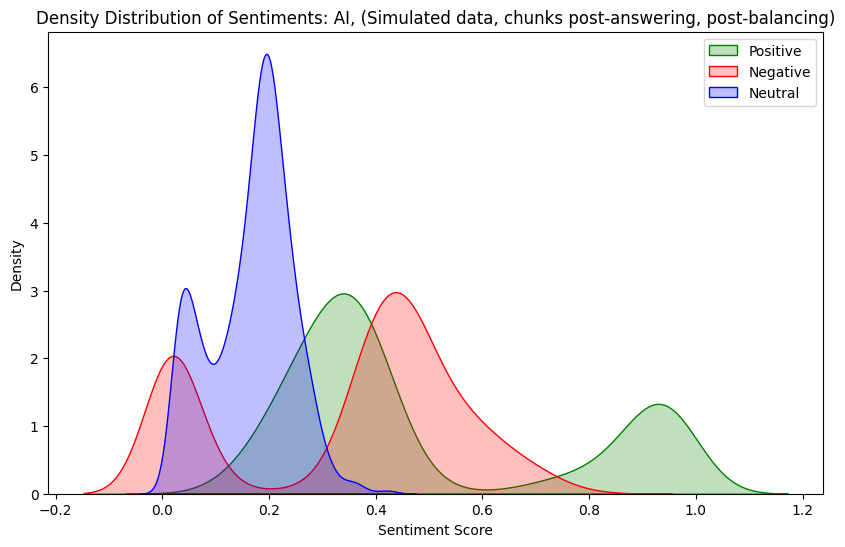

AI_label
AI_NEG    611
AI_NEU    491
AI_POS    453
Name: count, dtype: int64


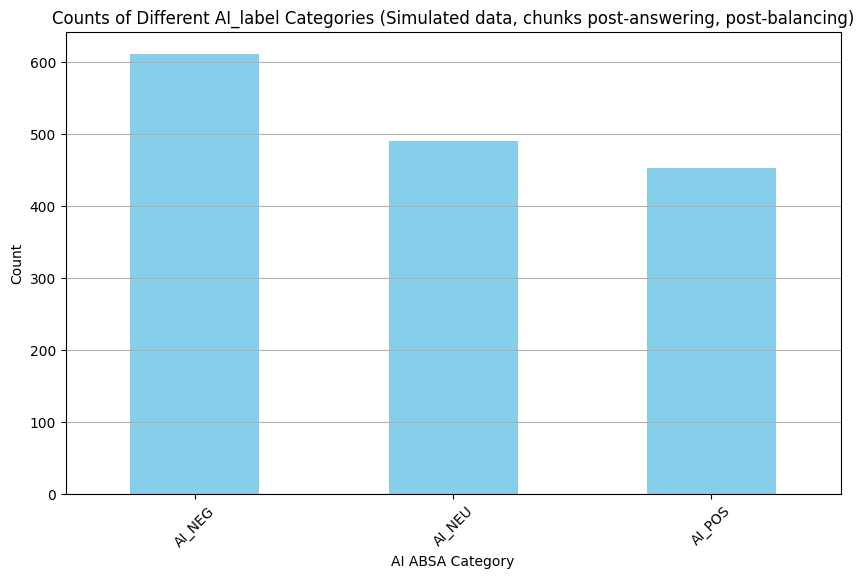

,index,Unnamed: 0,Q_subcat,Query,LLMRAG_response,node_number,node_content,extracted_text,node_id_from_nodes,metadata_from_nodes,article_body_from_nodes,AI_POS,AI_NEU,AI_NEG,AI_label
0,0,0,comparison,What are the differing views on the impact of ...,"\nBased on the context, there are differing vi...",node_0,Node ID: 84d6f2bb-cb7f-4e33-a41c-ec2631e7bc84 ...,Intensity builds around the integration of Art...,"('id_', '84d6f2bb-cb7f-4e33-a41c-ec2631e7bc84')","('metadata', {'title': 'AI in Fitness and Well...","('text', ""Intensity builds around the integrat...",0.257355,0.191526,0.551119,AI_NEG
1,1,1,ambiguous,What impact may AI have on fitness and wellness?,"\nBased on the context, AI has the potential t...",node_0,Node ID: d8dc52b3-bf77-4e6b-af30-9d6d890db083 ...,"In recent years, artificial intelligence (AI) ...","('id_', 'd8dc52b3-bf77-4e6b-af30-9d6d890db083')","('metadata', {'title': 'AI in Fitness and Well...","('text', ""In recent years, artificial intellig...",0.351594,0.365642,0.282764,AI_NEU
2,2,2,positive,How can AI positively influence fitness and we...,"\nBased on the context, AI can positively infl...",node_0,Node ID: 070dfabd-bbb3-41a7-9eb2-ad305652840c ...,In a fortunate turn of events for fitness enth...,"('id_', '070dfabd-bbb3-41a7-9eb2-ad305652840c')","('metadata', {'title': 'AI Revolutionizes Fitn...","('text', ""In a fortunate turn of events for fi...",0.958793,0.035015,0.006192,AI_POS
3,3,3,negative,How can AI negatively influence fitness and we...,"\nBased on the context, AI can negatively infl...",node_0,Node ID: d8dc52b3-bf77-4e6b-af30-9d6d890db083 ...,"In recent years, artificial intelligence (AI) ...","('id_', 'd8dc52b3-bf77-4e6b-af30-9d6d890db083')","('metadata', {'title': 'AI in Fitness and Well...","('text', ""In recent years, artificial intellig...",0.351594,0.365642,0.282764,AI_NEU
4,4,4,comparison,What are the differing views on the impact of ...,"\nBased on the context, there are several diff...",node_0,Node ID: c2fb5b4b-d3f4-4f2b-9883-85c1c6e7f197 ...,As the agriculture industry continues to witne...,"('id_', 'c2fb5b4b-d3f4-4f2b-9883-85c1c6e7f197')","('metadata', {'title': 'Concerns Grow Over the...","('text', 'As the agriculture industry continue...",0.347415,0.154931,0.497654,AI_NEG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,1550,1575,negative,How can AI negatively influence hydrology?,"\nBased on the context, AI can negatively infl...",node_4,Node ID: 7f791859-5fb9-4ac2-9edb-e1a68a80af6e ...,"In a rapidly evolving digital era, the buzzwor...","('id_', '7f791859-5fb9-4ac2-9edb-e1a68a80af6e')","('metadata', {'title': ""Concerns Arise Over AI...","('text', ""In a rapidly evolving digital era, t...",0.308578,0.264284,0.427138,AI_NEG
1551,1551,1576,comparison,What are the differing views on the impact of ...,"\nBased on the context, there are several diff...",node_4,Node ID: ec107606-e289-4edb-b044-1806fe108f21 ...,Innovation in the field of robotics has led to...,"('id_', 'ec107606-e289-4edb-b044-1806fe108f21')","('metadata', {'title': 'Artificial Intelligenc...","('text', 'Innovation in the field of robotics ...",0.354493,0.199124,0.446383,AI_NEU
1552,1552,1577,ambiguous,What impact may AI have on robotics?,"\nBased on the context, the integration of Art...",node_4,Node ID: ab03c673-ccc7-4461-b653-c619d4e35145 ...,In a world where innovation and technological ...,"('id_', 'ab03c673-ccc7-4461-b653-c619d4e35145')","('metadata', {'title': 'Artificial Intelligenc...","('text', ""In a world where innovation and tech...",0.294051,0.196520,0.509428,AI_NEG
1553,1553,1578,positive,How can AI positively influence robotics?,"\nBased on the context, AI can positively infl...",node_4,Node ID: c7362a9d-502a-4044-a662-4b2c373c1483 ...,Artificial Intelligence (AI) continues to revo...,"('id_', 'c7362a9d-502a-4044-a662-4b2c373c1483')","('metadata', {'title': 'AI in Robotics: Advanc...","('text', 'Artificial Intelligence (AI) continu...",0.747745,0.111928,0.140326,AI_POS


In [62]:
import pandas as pd
merged_df_subset = pd.read_csv(f"{path_to_root}/data/simulated/answers_simu_long_merged_nodes.csv")

# Run absa on nodes and save them
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F
from transformers import pipeline

# LOAD 1: (Aspect-Based Sentiment Analysis = ABSA) # 0 to 1, indicating level of confidence for each sentiment
absa_tokenizer = AutoTokenizer.from_pretrained("yangheng/deberta-v3-base-absa-v1.1")
absa_model = AutoModelForSequenceClassification \
  .from_pretrained("yangheng/deberta-v3-base-absa-v1.1")

# FUNCTION --------------- Get scores on for aspects
import torch
from torch.nn.functional import softmax
def run_absa_for_dataframe(df, aspects):
    for aspect in aspects:
        # Check if the columns already exist
        if not all(x in df.columns for x in [f'{aspect}_POS', f'{aspect}_NEU', f'{aspect}_NEG']):
            # Create a column for each aspect and sentiment if not exist
            df[f'{aspect}_POS'] = 0.0
            df[f'{aspect}_NEU'] = 0.0
            df[f'{aspect}_NEG'] = 0.0
            
            # Use iterrows() to iterate over DataFrame rows
            for index, row in df.iterrows():
                sentence = row['article_body_from_nodes']
                if pd.isna(sentence):
                    continue  # Skip rows where 'body' is NaN

                # Tokenize and predict sentiment
                inputs = absa_tokenizer(f"[CLS] {sentence} [SEP] {aspect} [SEP]", return_tensors="pt")
                with torch.no_grad():  # Disable gradient calculation
                    outputs = absa_model(**inputs)

                # Calculate probabilities
                probs = softmax(outputs.logits, dim=1).numpy()[0]

                # Assign the probabilities to the correct columns
                df.at[index, f'{aspect}_NEG'] = probs[0]
                df.at[index, f'{aspect}_NEU'] = probs[1]
                df.at[index, f'{aspect}_POS'] = probs[2]
        else:
            print(f"Columns for aspect '{aspect}' already exist. Skipping ABSA for this aspect.")

    return df
# FUNCTION END --------------- 

# Run function
aspects = ['AI']
           
merged_df_subset_absa = run_absa_for_dataframe(merged_df_subset, aspects)
print("Done with ABSA.")

# --- PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns

def plot_density_distributions(pos_list, neg_list, neu_list):
    plt.figure(figsize=(10, 6))

    sns.kdeplot(pos_list, shade=True, color="g", label="Positive")
    sns.kdeplot(neg_list, shade=True, color="r", label="Negative")
    sns.kdeplot(neu_list, shade=True, color="b", label="Neutral")

    plt.title(f"Density Distribution of Sentiments: {aspect}, (Simulated data, chunks post-answering, post-balancing)")
    plt.xlabel("Sentiment Score")
    plt.ylabel("Density")
    plt.legend()

    plt.show()

# Drop duplicates and other NA rows
merged_df_subset_absa = merged_df_subset_absa.drop_duplicates()
merged_df_subset_absa = merged_df_subset_absa.reset_index()

# PLOT
for aspect in aspects:
    plot_density_distributions(pos_list = merged_df_subset_absa[f'{aspect}_POS'],
                               neg_list = merged_df_subset_absa[f'{aspect}_NEG'],
                               neu_list = merged_df_subset_absa[f'{aspect}_NEU'])  

# -- CATEGORICAL PLOT
def find_max_label_with_combined_conditions(row):
    # Check if both AI_POS and AI_NEG are below 0.5
    if row['AI_POS'] <= 0.5 and row['AI_NEG'] <= 0.5:
        # If they are also within 0.1 of each other, assign 'AI_NEU'
        if abs(row['AI_POS'] - row['AI_NEG']) <= 0.1:
            return 'AI_NEU'
        else:
            # Otherwise, use the highest score
            scores = {'AI_POS': row['AI_POS'], 'AI_NEU': row['AI_NEU'], 'AI_NEG': row['AI_NEG']}
            max_label = max(scores, key=scores.get)
            return max_label
    else:
        # If either is above 0.5, use the highest score
        scores = {'AI_POS': row['AI_POS'], 'AI_NEU': row['AI_NEU'], 'AI_NEG': row['AI_NEG']}
        max_label = max(scores, key=scores.get)
        return max_label


# Apply the function to each row to create the 'AI_label' column
merged_df_subset_absa['AI_label'] = merged_df_subset_absa.apply(find_max_label_with_combined_conditions, axis=1)

# Count the occurrences of each category
category_counts_absaai = merged_df_subset_absa['AI_label'].value_counts()

# Print the counts
print(category_counts_absaai)

# Plotting
plt.figure(figsize=(10, 6))
category_counts_absaai.plot(kind='bar', color='skyblue')
plt.title('Counts of Different AI_label Categories (Simulated data, chunks post-answering, post-balancing)')
plt.xlabel('AI ABSA Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

merged_df_subset_absa

In [63]:
#merged_df_subset_absa.to_csv(f"{path_to_root}/data/simulated/answers_simu_long_merged_nodes_with_absa.csv")

# AUGMENTED DATA (THE NEWS DATASET)
- getting node text on answer nodes (only on RAG resp) with str matching
- cleaning up
- running ABSA only on RAG resp
- saving to disk: #merged_df_subset_absa.to_csv(f"{path_to_root}/data/answers/full_aug/df_aug_prelim_answers_SNF_prompt4_with_nodes_with_absa.csv")

In [6]:
path_to_root = '/work/PernilleHøjlundBrams#8577/NLP_2023_P'

# - Get data in from the two eval runs
import pandas as pd

# Get data in
SNF_prelim = pd.read_csv(f"{path_to_root}/data/answers/full_aug/df_aug_absa_prelim_answers_SNF_prompt4.csv").drop(columns = ['Unnamed: 0'])
SNF_prelim = SNF_prelim.drop(columns = ['LLM_response']) # for some reason didnt get LLM_resp, deleting col

# Delete rows with NA in LLMRAG_response
SNF_prelim = SNF_prelim.dropna(subset=['LLMRAG_response'])
SNF_prelim = SNF_prelim.reset_index()
SNF_prelim = SNF_prelim.drop(columns = ['index'])

SNF_prelim 

,Q_subcat,Q_category,topical,query,LLMRAG_response,node_0,node_1,node_2,node_3,node_4
0,ambiguous,S_non_factoid,College and new technologies,How might AI influence traditional manufacturi...,"\nBased on the context, AI can influence tradi...",Node ID: c6e83947-58e8-4e76-877c-033192134461\...,Node ID: 3ab6c79c-369d-4f2b-b579-666882bafa14\...,Node ID: 06817864-e006-433d-a56e-a3053c9d7280\...,Node ID: 77d054b6-dd44-4c1c-839a-c6fb8a0c36f3\...,Node ID: 4cf135ed-a408-4413-8187-5571f64c9362\...
1,positive,S_non_factoid,College and new technologies,How might AI positively influence traditional ...,"\nBased on the context, AI can positively infl...",Node ID: c6e83947-58e8-4e76-877c-033192134461\...,Node ID: 06817864-e006-433d-a56e-a3053c9d7280\...,Node ID: d187a3b7-6f2e-40bc-98c6-f46fc35f147a\...,Node ID: 4cf135ed-a408-4413-8187-5571f64c9362\...,Node ID: 3ab6c79c-369d-4f2b-b579-666882bafa14\...
2,negative,S_non_factoid,College and new technologies,How might AI negatively influence traditional ...,"\nBased on the context, AI has the potential t...",Node ID: 6a1edf3e-f00b-48d8-85bb-09df5c805230\...,Node ID: dca154c7-b679-4220-9296-fd5024c2b4e7\...,Node ID: 9ab8b1aa-a07c-4cdc-b7ce-bb6745c42a21\...,Node ID: 06817864-e006-433d-a56e-a3053c9d7280\...,Node ID: d868455f-c409-4e6a-b40b-693dbeea3023\...
3,ambiguous,S_non_factoid,Medical diagnostics,What impact might AI have on medical diagnosti...,"\nBased on the context, AI has the potential t...",Node ID: 79447286-3d52-41eb-baf1-8ec4464a3297\...,Node ID: a37f8077-39af-42cf-9066-23245dcb4853\...,Node ID: fff446ed-6ccd-400e-9877-8502e4232ac2\...,Node ID: 6fbd5858-6c71-4f4a-8bd9-a7a36b9708c2\...,Node ID: 1d87c9d6-a0d8-4523-8cd5-1924a3946186\...
4,positive,S_non_factoid,Medical diagnostics,How might AI positively influence medical diag...,"\nBased on the context, AI has the potential t...",Node ID: 79447286-3d52-41eb-baf1-8ec4464a3297\...,Node ID: a37f8077-39af-42cf-9066-23245dcb4853\...,Node ID: 1d87c9d6-a0d8-4523-8cd5-1924a3946186\...,Node ID: 01d3db9c-f3c2-466c-a89f-8a5d393f11ef\...,Node ID: a072dd04-da9e-44b3-9b2b-bda9b784c191\...
5,negative,S_non_factoid,Medical diagnostics,How might AI negatively influence medical diag...,"\nBased on the context, AI can negatively infl...",Node ID: fff446ed-6ccd-400e-9877-8502e4232ac2\...,Node ID: 6fbd5858-6c71-4f4a-8bd9-a7a36b9708c2\...,Node ID: 79447286-3d52-41eb-baf1-8ec4464a3297\...,Node ID: a37f8077-39af-42cf-9066-23245dcb4853\...,Node ID: 2b1263e2-f230-4308-88de-216c21494aea\...
6,ambiguous,S_non_factoid,Data models and bio systems,How might AI impact automated systems?,"\nBased on the context, AI can impact automate...",Node ID: 173b16fa-14ba-44ec-9682-606b1e8b5f38\...,Node ID: fbda1ba4-ffb9-49a3-879c-3072f60401e4\...,Node ID: 8ec63eb9-5e3b-4893-8e86-b43c2d6698de\...,Node ID: d868455f-c409-4e6a-b40b-693dbeea3023\...,Node ID: b7edb3d0-3a14-4f53-a31f-4c69d2c66495\...
7,positive,S_non_factoid,Data models and bio systems,How might AI positively impact automated systems?,"\nBased on the context, AI can positively impa...",Node ID: fbda1ba4-ffb9-49a3-879c-3072f60401e4\...,Node ID: 8ec63eb9-5e3b-4893-8e86-b43c2d6698de\...,Node ID: b7edb3d0-3a14-4f53-a31f-4c69d2c66495\...,Node ID: 3ab6c79c-369d-4f2b-b579-666882bafa14\...,Node ID: c6e83947-58e8-4e76-877c-033192134461\...
8,negative,S_non_factoid,Data models and bio systems,How might AI negatively impact automated systems?,"\nBased on the context, AI could negatively im...",Node ID: b9bce724-ca53-4841-9ec4-f6f39c8d1809\...,Node ID: 173b16fa-14ba-44ec-9682-606b1e8b5f38\...,Node ID: d868455f-c409-4e6a-b40b-693dbeea3023\...,Node ID: 5b9eecbe-6c63-4a5b-ac8f-39aaf090ddc1\...,Node ID: 6a1edf3e-f00b-48d8-85bb-09df5c805230\...
9,ambiguous,S_non_factoid,Data Science and Computing,How might AI influence use of predictive algor...,"\nBased on the context, AI can influence the u...",Node ID: 173b16fa-14ba-44ec-9682-606b1e8b5f38\...,Node ID: 79447286-3d52-41eb-baf1-8ec4464a3297\...,Node ID: 01d3db9c-f3c2-466c-a89f-8a5d393f11

## Put full nodetext on

In [7]:
# Sometime in the concatenated_df, some newline breaks are in the text... ('Node ID: 84d6f2bb-cb7f-4e33-a41c-ec2631e7bc84\nText: Intensity builds around the integration of Artificial\nIntelligence (AI) i) 
# let's remove them
SNF_prelim['node_0'][0]

# Loop over the 'node_x' columns and replace '\n' with an empty string
for i in range(5):  #  columns are 'node_0', 'node_1', ..., 'node_4'
    col_name = f'node_{i}'
    SNF_prelim[col_name] = SNF_prelim[col_name].str.replace('\n', ' ', regex=False)
    SNF_prelim[col_name] = SNF_prelim[col_name].str.replace('\\n', ' ', regex=False)

# Now the DataFrame concatenated_df will have the newline characters removed from the 'node_x' columns
SNF_prelim['node_0'][0]

"Node ID: c6e83947-58e8-4e76-877c-033192134461 Text: “You don’t teach these devices all the rules, you teach them how to learn the rules.”', 'Making manufacturing and design smarter Artificial intelligence can not only help improve how users interact with products, devices, and environments. It can also improve the efficiency with which objects are made by optimizing the manufacturing and design ... Score:  0.867 "

In [9]:
SNF_prelim.columns

Index(['Q_subcat', 'Q_category', 'topical', 'query', 'LLMRAG_response',
       'node_0', 'node_1', 'node_2', 'node_3', 'node_4'],
      dtype='object')

In [13]:
SNF_prelim_long = SNF_prelim.melt( # id_vars = cols you want to keep unchanged
                       id_vars=['Q_subcat','Q_category','topical','query', 'LLMRAG_response'], 
                       
                       # value_vars = cols you melt to long 
                       value_vars=['node_0', 'node_1', 'node_2', 'node_3', 'node_4'], 

                       # var_name = name of new col containing the *names* of the melted cols
                       var_name='node_number', 
                       
                       # value_name = name of new col containing the *values* of the melted cols
                       value_name='node_content')


# ---- Extract text and append
import pandas as pd
import re

def extract_text_snippet(text):
    # Adjust the regular expression to match text from 'Text:' up to '...'
    match = re.search(r'Text: (.*?)\.\.\.', text, re.DOTALL)
    if match:
        # Extract up to the first 10-15 tokens
        tokens = match.group(1).replace('\n', ' ').split()
        return ' '.join(tokens[:18]) if len(tokens) >= 13 else ' '.join(tokens)
    else:
        return None

# Apply the function to the 'node_content' column
SNF_prelim_long['extracted_text'] = SNF_prelim_long['node_content'].apply(extract_text_snippet)

# ---- 
import pandas as pd
import re

# Load the nodes DataFrame
# - Get node data in
import pandas as pd
nodes_df_aug_absa = pd.read_csv(f"{path_to_root}/data/prelim_dataframes/nodes_df_aug_absa.csv").drop(columns = ['Unnamed: 0'])
nodes_df_aug_absa['7'] = nodes_df_aug_absa['7'].astype(str)

matches = []
extracted_texts = []

for snippet in SNF_prelim_long['extracted_text']:
    if snippet:
        # Escape regex special characters in the snippet
        escaped_snippet = re.escape(snippet)

        # Check if the snippet is in any 'text' entry of the other DataFrame
        match = nodes_df_aug_absa['7'].str.contains(escaped_snippet, na=False, regex=True)
        matched_nodes = nodes_df_aug_absa[match]

        # Store matches and corresponding extracted text
        if not matched_nodes.empty:
            matches.append(matched_nodes)
            extracted_texts.extend([snippet] * len(matched_nodes))

# Concatenate all matches
all_matches = pd.concat(matches)

# Add a new column for the extracted text
all_matches['extracted_text'] = extracted_texts

all_matches
# Now you can merge df_SNF_long and all_matches on the 'extracted_text' column

# Perform a left merge to keep all rows from df_SNF_long
merged_df = pd.merge(SNF_prelim_long, all_matches, on='extracted_text', how='left')
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.reset_index()
merged_df = merged_df.drop(columns = ['index'])
merged_df
#merged_df['7'] = merged_df['7'].astype(str) # was full_node_text before


,Q_subcat,Q_category,topical,query,LLMRAG_response,node_number,node_content,extracted_text,0,1,...,3,4,5,6,7,8,9,10,11,12
0,ambiguous,S_non_factoid,College and new technologies,How might AI influence traditional manufacturi...,"\nBased on the context, AI can influence tradi...",node_0,Node ID: c6e83947-58e8-4e76-877c-033192134461 ...,"“You don’t teach these devices all the rules, ...","('id_', 'c6e83947-58e8-4e76-877c-033192134461')","('embedding', None)",...,"('excluded_embed_metadata_keys', [])","('excluded_llm_metadata_keys', [])","('relationships', {<NodeRelationship.SOURCE: '...","('hash', '0d21230eac6ef5696b6b9be69e7348596016...","('text', ""“You don’t teach these devices all t...","('start_char_idx', 8210)","('end_char_idx', 10409)","('text_template', '{metadata_str}\n\n{content}')","('metadata_template', '{key}: {value}')","('metadata_seperator', '\n')"
1,positive,S_non_factoid,College and new technologies,How might AI positively influence traditional ...,"\nBased on the context, AI can positively infl...",node_0,Node ID: c6e83947-58e8-4e76-877c-033192134461 ...,"“You don’t teach these devices all the rules, ...","('id_', 'c6e83947-58e8-4e76-877c-033192134461')","('embedding', None)",...,"('excluded_embed_metadata_keys', [])","('excluded_llm_metadata_keys', [])","('relationships', {<NodeRelationship.SOURCE: '...","('hash', '0d21230eac6ef5696b6b9be69e7348596016...","('text', ""“You don’t teach these devices all t...","('start_char_idx', 8210)","('end_char_idx', 10409)","('text_template', '{metadata_str}\n\n{content}')","('metadata_template', '{key}: {value}')","('metadata_seperator', '\n')"
2,negative,S_non_factoid,College and new technologies,How might AI negatively influence traditional ...,"\nBased on the context, AI has the potential t...",node_0,Node ID: 6a1edf3e-f00b-48d8-85bb-09df5c805230 ...,Automation through AI will increase productivi...,"('id_', '6a1edf3e-f00b-48d8-85bb-09df5c805230')","('embedding', None)",...,"('excluded_embed_metadata_keys', [])","('excluded_llm_metadata_keys', [])","('relationships', {<NodeRelationship.SOURCE: '...","('hash', '741175b60a75a6b6663c4d4a6ab782e5d1e2...","('text', 'Automation through AI will increase ...","('start_char_idx', 2153)","('end_char_idx', 4167)","('text_template', '{metadata_str}\n\n{content}')","('metadata_template', '{key}: {value}')","('metadata_seperator', '\n')"
3,ambiguous,S_non_factoid,Medical diagnostics,What impact might AI have on medical diagnosti...,"\nBased on the context, AI has the potential t...",node_0,Node ID: 79447286-3d52-41eb-baf1-8ec4464a3297 ...,Artificial Intelligence (AI) is moving fast an...,"('id_', '79447286-3d52-41eb-baf1-8ec4464a3297')","('embedding', None)",...,"('excluded_embed_metadata_keys', [])","('excluded_llm_metadata_keys', [])","('relationships', {<NodeRelationship.SOURCE: '...","('hash', 'c3edd665d8e00125c8bc9f7318e263e0ebec...","('text', 'Artificial Intelligence (AI) is movi...","('start_char_idx', 0)","('end_char_idx', 2276)","('text_template', '{metadata_str}\n\n{content}')","('metadata_template', '{key}: {value}')","('metadata_seperator', '\n')"
4,positive,S_non_factoid,Medical diagnostics,How might AI positively influence medical diag...,"\nBased on the context, AI has the potential t...",node_0,Node ID: 79447286-3d52-41eb-baf1-8ec4464a3297 ...,Artificial Intelligence (AI) is moving fast an...,"('id_', '79447286-3d52-41eb-baf1-8ec4464a3297')","('embedding', None)",...,"('excluded_embed_metadata_keys', [])","('excluded_llm_metadata_keys', [])","('relationships', {<NodeRelationship.SOURCE: '...","('hash', 'c3edd665d8e00125c8bc9f7318e263e0ebec...","('text', 'Artificial Intelligence (AI) is movi...","('start_char_idx', 0)","('end_char_idx', 2276)","('text_template', '{metadata_str}\n\n{content}')","('metadata_template', '{key}: {value}')","('metadata_seperator', '\n')"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,positive,S_non_factoid,Technology and worker science,How might AI

In [ ]:
rename_dict = {
    '0': 'node_id_from_nodes',
    '2': 'metadata_from_nodes',
    '7': 'article_body_from_nodes'
}

merged_df.rename(columns=rename_dict, inplace=True)
merged_df

In [16]:
merged_df.columns

Index(['Q_subcat', 'Q_category', 'topical', 'query', 'LLMRAG_response',
       'node_number', 'node_content', 'extracted_text', 'node_id_from_nodes',
       '1', 'metadata_from_nodes', '3', '4', '5', '6',
       'article_body_from_nodes', '8', '9', '10', '11', '12'],
      dtype='object')

In [17]:
merged_df_subset = merged_df[['Q_subcat',
                             'query',
                             'topical',
                             'LLMRAG_response',
                             'node_number',
                             'node_content',
                             'extracted_text',
                             'node_id_from_nodes',
                             'metadata_from_nodes',
                             'article_body_from_nodes']]
merged_df_subset = merged_df_subset.drop_duplicates()
merged_df_subset

,Q_subcat,query,topical,LLMRAG_response,node_number,node_content,extracted_text,node_id_from_nodes,metadata_from_nodes,article_body_from_nodes
0,ambiguous,How might AI influence traditional manufacturi...,College and new technologies,"\nBased on the context, AI can influence tradi...",node_0,Node ID: c6e83947-58e8-4e76-877c-033192134461 ...,"“You don’t teach these devices all the rules, ...","('id_', 'c6e83947-58e8-4e76-877c-033192134461')","('metadata', {'title': 'Revolutionizing everyd...","('text', ""“You don’t teach these devices all t..."
1,positive,How might AI positively influence traditional ...,College and new technologies,"\nBased on the context, AI can positively infl...",node_0,Node ID: c6e83947-58e8-4e76-877c-033192134461 ...,"“You don’t teach these devices all the rules, ...","('id_', 'c6e83947-58e8-4e76-877c-033192134461')","('metadata', {'title': 'Revolutionizing everyd...","('text', ""“You don’t teach these devices all t..."
2,negative,How might AI negatively influence traditional ...,College and new technologies,"\nBased on the context, AI has the potential t...",node_0,Node ID: 6a1edf3e-f00b-48d8-85bb-09df5c805230 ...,Automation through AI will increase productivi...,"('id_', '6a1edf3e-f00b-48d8-85bb-09df5c805230')","('metadata', {'title': 'Exploring the risks of...","('text', 'Automation through AI will increase ..."
3,ambiguous,What impact might AI have on medical diagnosti...,Medical diagnostics,"\nBased on the context, AI has the potential t...",node_0,Node ID: 79447286-3d52-41eb-baf1-8ec4464a3297 ...,Artificial Intelligence (AI) is moving fast an...,"('id_', '79447286-3d52-41eb-baf1-8ec4464a3297')","('metadata', {'title': 'AI has potential to re...","('text', 'Artificial Intelligence (AI) is movi..."
4,positive,How might AI positively influence medical diag...,Medical diagnostics,"\nBased on the context, AI has the potential t...",node_0,Node ID: 79447286-3d52-41eb-baf1-8ec4464a3297 ...,Artificial Intelligence (AI) is moving fast an...,"('id_', '79447286-3d52-41eb-baf1-8ec4464a3297')","('metadata', {'title': 'AI has potential to re...","('text', 'Artificial Intelligence (AI) is movi..."
...,...,...,...,...,...,...,...,...,...,...
280,positive,How might AI positively influence education an...,Technology and worker science,"\nBased on the context, AI can positively infl...",node_4,Node ID: 46dbdae8-bcd0-4e8e-8f3b-ed8021d36e2a ...,"For example, students learn that using generat...",NaN,NaN,NaN
281,negative,How might AI negatively influence education an...,Technology and worker science,"\nBased on the context, AI may negatively infl...",node_4,Node ID: 173b16fa-14ba-44ec-9682-606b1e8b5f38 ...,And if you know someone caught up in the crimi...,"('id_', '173b16fa-14ba-44ec-9682-606b1e8b5f38')","('metadata', {'title': 'Forget dystopian scena...","('text', 'And if you know someone caught up in..."
282,ambiguous,What impact might AI have on education?,Education and content generation,"\nBased on the context, AI has the potential t...",node_4,Node ID: 741993f4-3d1e-4ab0-affe-6156d80d751f ...,There is interest in incorporating social stud...,"('id_', '741993f4-3d1e-4ab0-affe-6156d80d751f')","('metadata', {'title': 'Bringing artificial in...","('text', ""There is interest in incorporating s..."
283,positive,How might AI positively influence education?,Education and content generation,"\nBased on the context, AI can positively infl...",node_4,Node ID: f6e38cd7-7832-4659-bb21-98346418127e ...,This work provides an effective and safe space...,"('id_', 'f6e38cd7-7832-4659-bb21-98346418127e')","('metadata', {'title': 'Helping students of al...","('text', 'This work provides an effective and ..."


In [23]:
#-- Any extracted_text values empty?
# Filter rows where 'extracted_text' is either an empty string or None
empty_extracted_text_rows = merged_df_subset[merged_df_subset['extracted_text'].isnull() | (merged_df_subset['extracted_text'] == '')]

# Display these rows
empty_extracted_text_rows

# Check if the empty extracted_text_rows have content somewhere else in the dataframe and therefore can be deleted
# Create a new column to indicate if a filled-out extracted_text exists elsewhere for the same Query
empty_extracted_text_rows['filled_elsewhere'] = False

for index, row in empty_extracted_text_rows.iterrows():
    query = row['query']
    
    # Check if there's a non-empty extracted_text for the same Query in merged_df_subset
    filled_rows = merged_df_subset[(merged_df_subset['query'] == query) & 
                                   (merged_df_subset['extracted_text'].notnull()) & 
                                   (merged_df_subset['extracted_text'] != '')]

    if not filled_rows.empty:
        # If there are filled rows, update the flag
        empty_extracted_text_rows.at[index, 'filled_elsewhere'] = True

# If 'filled_elsewhere' is true delete the rows from merged_df_subset
# Get indices from empty_extracted_text_rows where 'filled_elsewhere' is True
indices_to_remove = empty_extracted_text_rows[empty_extracted_text_rows['filled_elsewhere']].index

# Remove these rows from merged_df_subset
merged_df_subset = merged_df_subset.drop(indices_to_remove)
merged_df_subset

/tmp/ipykernel_1117492/1304361072.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_extracted_text_rows['filled_elsewhere'] = False


,Q_subcat,query,topical,LLMRAG_response,node_number,node_content,extracted_text,node_id_from_nodes,metadata_from_nodes,article_body_from_nodes
0,ambiguous,How might AI influence traditional manufacturi...,College and new technologies,"\nBased on the context, AI can influence tradi...",node_0,Node ID: c6e83947-58e8-4e76-877c-033192134461 ...,"“You don’t teach these devices all the rules, ...","('id_', 'c6e83947-58e8-4e76-877c-033192134461')","('metadata', {'title': 'Revolutionizing everyd...","('text', ""“You don’t teach these devices all t..."
1,positive,How might AI positively influence traditional ...,College and new technologies,"\nBased on the context, AI can positively infl...",node_0,Node ID: c6e83947-58e8-4e76-877c-033192134461 ...,"“You don’t teach these devices all the rules, ...","('id_', 'c6e83947-58e8-4e76-877c-033192134461')","('metadata', {'title': 'Revolutionizing everyd...","('text', ""“You don’t teach these devices all t..."
2,negative,How might AI negatively influence traditional ...,College and new technologies,"\nBased on the context, AI has the potential t...",node_0,Node ID: 6a1edf3e-f00b-48d8-85bb-09df5c805230 ...,Automation through AI will increase productivi...,"('id_', '6a1edf3e-f00b-48d8-85bb-09df5c805230')","('metadata', {'title': 'Exploring the risks of...","('text', 'Automation through AI will increase ..."
3,ambiguous,What impact might AI have on medical diagnosti...,Medical diagnostics,"\nBased on the context, AI has the potential t...",node_0,Node ID: 79447286-3d52-41eb-baf1-8ec4464a3297 ...,Artificial Intelligence (AI) is moving fast an...,"('id_', '79447286-3d52-41eb-baf1-8ec4464a3297')","('metadata', {'title': 'AI has potential to re...","('text', 'Artificial Intelligence (AI) is movi..."
4,positive,How might AI positively influence medical diag...,Medical diagnostics,"\nBased on the context, AI has the potential t...",node_0,Node ID: 79447286-3d52-41eb-baf1-8ec4464a3297 ...,Artificial Intelligence (AI) is moving fast an...,"('id_', '79447286-3d52-41eb-baf1-8ec4464a3297')","('metadata', {'title': 'AI has potential to re...","('text', 'Artificial Intelligence (AI) is movi..."
...,...,...,...,...,...,...,...,...,...,...
280,positive,How might AI positively influence education an...,Technology and worker science,"\nBased on the context, AI can positively infl...",node_4,Node ID: 46dbdae8-bcd0-4e8e-8f3b-ed8021d36e2a ...,"For example, students learn that using generat...",NaN,NaN,NaN
281,negative,How might AI negatively influence education an...,Technology and worker science,"\nBased on the context, AI may negatively infl...",node_4,Node ID: 173b16fa-14ba-44ec-9682-606b1e8b5f38 ...,And if you know someone caught up in the crimi...,"('id_', '173b16fa-14ba-44ec-9682-606b1e8b5f38')","('metadata', {'title': 'Forget dystopian scena...","('text', 'And if you know someone caught up in..."
282,ambiguous,What impact might AI have on education?,Education and content generation,"\nBased on the context, AI has the potential t...",node_4,Node ID: 741993f4-3d1e-4ab0-affe-6156d80d751f ...,There is interest in incorporating social stud...,"('id_', '741993f4-3d1e-4ab0-affe-6156d80d751f')","('metadata', {'title': 'Bringing artificial in...","('text', ""There is interest in incorporating s..."
283,positive,How might AI positively influence education?,Education and content generation,"\nBased on the context, AI can positively infl...",node_4,Node ID: f6e38cd7-7832-4659-bb21-98346418127e ...,This work provides an effective and safe space...,"('id_', 'f6e38cd7-7832-4659-bb21-98346418127e')","('metadata', {'title': 'Helping students of al...","('text', 'This work provides an effective and ..."


In [25]:
# #-- Anywhere col article_body_from_nodes is empty? 
# Check if column 'article_body_from_nodes' is empty (either an empty string or NaN)
empty_article_body_rows = merged_df_subset[merged_df_subset['article_body_from_nodes'].isna() | (merged_df_subset['article_body_from_nodes'] == '')]

# Display these rows
empty_article_body_rows

# Add a new column to indicate if a non-empty article_body_from_nodes exists elsewhere for the same Query
empty_article_body_rows['filled_elsewhere'] = False

for index, row in empty_article_body_rows.iterrows():
    query = row['query']
    
    # Check if there's a non-empty article_body_from_nodes for the same Query in merged_df_subset
    filled_rows = merged_df_subset[(merged_df_subset['query'] == query) & 
                                   (merged_df_subset['article_body_from_nodes'].notna()) & 
                                   (merged_df_subset['article_body_from_nodes'] != '')]

    if not filled_rows.empty:
        # If there are filled rows, update the flag
        empty_article_body_rows.at[index, 'filled_elsewhere'] = True

# Display the updated DataFrame
empty_article_body_rows

# If 'filled_elsewhere' is true delete the rows from merged_df_subset
# Get indices from empty_extracted_text_rows where 'filled_elsewhere' is True
indices_to_remove = empty_article_body_rows[empty_article_body_rows['filled_elsewhere']].index

# Remove these rows from merged_df_subset
merged_df_subset = merged_df_subset.drop(indices_to_remove)
merged_df_subset

/tmp/ipykernel_1117492/690481613.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_article_body_rows['filled_elsewhere'] = False


,Q_subcat,query,topical,LLMRAG_response,node_number,node_content,extracted_text,node_id_from_nodes,metadata_from_nodes,article_body_from_nodes
0,ambiguous,How might AI influence traditional manufacturi...,College and new technologies,"\nBased on the context, AI can influence tradi...",node_0,Node ID: c6e83947-58e8-4e76-877c-033192134461 ...,"“You don’t teach these devices all the rules, ...","('id_', 'c6e83947-58e8-4e76-877c-033192134461')","('metadata', {'title': 'Revolutionizing everyd...","('text', ""“You don’t teach these devices all t..."
1,positive,How might AI positively influence traditional ...,College and new technologies,"\nBased on the context, AI can positively infl...",node_0,Node ID: c6e83947-58e8-4e76-877c-033192134461 ...,"“You don’t teach these devices all the rules, ...","('id_', 'c6e83947-58e8-4e76-877c-033192134461')","('metadata', {'title': 'Revolutionizing everyd...","('text', ""“You don’t teach these devices all t..."
2,negative,How might AI negatively influence traditional ...,College and new technologies,"\nBased on the context, AI has the potential t...",node_0,Node ID: 6a1edf3e-f00b-48d8-85bb-09df5c805230 ...,Automation through AI will increase productivi...,"('id_', '6a1edf3e-f00b-48d8-85bb-09df5c805230')","('metadata', {'title': 'Exploring the risks of...","('text', 'Automation through AI will increase ..."
3,ambiguous,What impact might AI have on medical diagnosti...,Medical diagnostics,"\nBased on the context, AI has the potential t...",node_0,Node ID: 79447286-3d52-41eb-baf1-8ec4464a3297 ...,Artificial Intelligence (AI) is moving fast an...,"('id_', '79447286-3d52-41eb-baf1-8ec4464a3297')","('metadata', {'title': 'AI has potential to re...","('text', 'Artificial Intelligence (AI) is movi..."
4,positive,How might AI positively influence medical diag...,Medical diagnostics,"\nBased on the context, AI has the potential t...",node_0,Node ID: 79447286-3d52-41eb-baf1-8ec4464a3297 ...,Artificial Intelligence (AI) is moving fast an...,"('id_', '79447286-3d52-41eb-baf1-8ec4464a3297')","('metadata', {'title': 'AI has potential to re...","('text', 'Artificial Intelligence (AI) is movi..."
...,...,...,...,...,...,...,...,...,...,...
279,ambiguous,How might AI influence education and workforce...,Technology and worker science,"\nBased on the context, AI may influence educa...",node_4,Node ID: 3e0fb010-0ba1-4419-82b5-20efbfa0a10e ...,"CTO Kratsios — moderator Erik Brynjolfsson, di...","('id_', '3e0fb010-0ba1-4419-82b5-20efbfa0a10e')","('metadata', {'title': 'MIT conference focuses...","('text', ""CTO Kratsios — moderator Erik Brynjo..."
281,negative,How might AI negatively influence education an...,Technology and worker science,"\nBased on the context, AI may negatively infl...",node_4,Node ID: 173b16fa-14ba-44ec-9682-606b1e8b5f38 ...,And if you know someone caught up in the crimi...,"('id_', '173b16fa-14ba-44ec-9682-606b1e8b5f38')","('metadata', {'title': 'Forget dystopian scena...","('text', 'And if you know someone caught up in..."
282,ambiguous,What impact might AI have on education?,Education and content generation,"\nBased on the context, AI has the potential t...",node_4,Node ID: 741993f4-3d1e-4ab0-affe-6156d80d751f ...,There is interest in incorporating social stud...,"('id_', '741993f4-3d1e-4ab0-affe-6156d80d751f')","('metadata', {'title': 'Bringing artificial in...","('text', ""There is interest in incorporating s..."
283,positive,How might AI positively influence education?,Education and content generation,"\nBased on the context, AI can positively infl...",node_4,Node ID: f6e38cd7-7832-4659-bb21-98346418127e ...,This work provides an effective and safe space...,"('id_', 'f6e38cd7-7832-4659-bb21-98346418127e')","('metadata', {'title': 'Helping students of al...","('text', 'This work provides an effective and ..."


In [28]:
#merged_df_subset.to_csv(f"{path_to_root}/data/answers/full_aug/df_aug_prelim_answers_SNF_prompt4_with_nodes.csv")

## ABSA
For some reason a data loss of 280 ish to 218. Continuing anyways

In [30]:
merged_df_subset = merged_df_subset.reset_index()
merged_df_subset#['article_body_from_nodes']

,level_0,index,Q_subcat,query,topical,LLMRAG_response,node_number,node_content,extracted_text,node_id_from_nodes,metadata_from_nodes,article_body_from_nodes
0,0,0,ambiguous,How might AI influence traditional manufacturi...,College and new technologies,"\nBased on the context, AI can influence tradi...",node_0,Node ID: c6e83947-58e8-4e76-877c-033192134461 ...,"“You don’t teach these devices all the rules, ...","('id_', 'c6e83947-58e8-4e76-877c-033192134461')","('metadata', {'title': 'Revolutionizing everyd...","('text', ""“You don’t teach these devices all t..."
1,1,1,positive,How might AI positively influence traditional ...,College and new technologies,"\nBased on the context, AI can positively infl...",node_0,Node ID: c6e83947-58e8-4e76-877c-033192134461 ...,"“You don’t teach these devices all the rules, ...","('id_', 'c6e83947-58e8-4e76-877c-033192134461')","('metadata', {'title': 'Revolutionizing everyd...","('text', ""“You don’t teach these devices all t..."
2,2,2,negative,How might AI negatively influence traditional ...,College and new technologies,"\nBased on the context, AI has the potential t...",node_0,Node ID: 6a1edf3e-f00b-48d8-85bb-09df5c805230 ...,Automation through AI will increase productivi...,"('id_', '6a1edf3e-f00b-48d8-85bb-09df5c805230')","('metadata', {'title': 'Exploring the risks of...","('text', 'Automation through AI will increase ..."
3,3,3,ambiguous,What impact might AI have on medical diagnosti...,Medical diagnostics,"\nBased on the context, AI has the potential t...",node_0,Node ID: 79447286-3d52-41eb-baf1-8ec4464a3297 ...,Artificial Intelligence (AI) is moving fast an...,"('id_', '79447286-3d52-41eb-baf1-8ec4464a3297')","('metadata', {'title': 'AI has potential to re...","('text', 'Artificial Intelligence (AI) is movi..."
4,4,4,positive,How might AI positively influence medical diag...,Medical diagnostics,"\nBased on the context, AI has the potential t...",node_0,Node ID: 79447286-3d52-41eb-baf1-8ec4464a3297 ...,Artificial Intelligence (AI) is moving fast an...,"('id_', '79447286-3d52-41eb-baf1-8ec4464a3297')","('metadata', {'title': 'AI has potential to re...","('text', 'Artificial Intelligence (AI) is movi..."
...,...,...,...,...,...,...,...,...,...,...,...,...
213,213,279,ambiguous,How might AI influence education and workforce...,Technology and worker science,"\nBased on the context, AI may influence educa...",node_4,Node ID: 3e0fb010-0ba1-4419-82b5-20efbfa0a10e ...,"CTO Kratsios — moderator Erik Brynjolfsson, di...","('id_', '3e0fb010-0ba1-4419-82b5-20efbfa0a10e')","('metadata', {'title': 'MIT conference focuses...","('text', ""CTO Kratsios — moderator Erik Brynjo..."
214,214,281,negative,How might AI negatively influence education an...,Technology and worker science,"\nBased on the context, AI may negatively infl...",node_4,Node ID: 173b16fa-14ba-44ec-9682-606b1e8b5f38 ...,And if you know someone caught up in the crimi...,"('id_', '173b16fa-14ba-44ec-9682-606b1e8b5f38')","('metadata', {'title': 'Forget dystopian scena...","('text', 'And if you know someone caught up in..."
215,215,282,ambiguous,What impact might AI have on education?,Education and content generation,"\nBased on the context, AI has the potential t...",node_4,Node ID: 741993f4-3d1e-4ab0-affe-6156d80d751f ...,There is interest in incorporating social stud...,"('id_', '741993f4-3d1e-4ab0-affe-6156d80d751f')","('metadata', {'title': 'Bringing artificial in...","('text', ""There is interest in incorporating s..."
216,216,283,positive,How might AI positively influence education?,Education and content generation,"\nBased on the context, AI can positively infl...",node_4,Node ID: f6e38cd7-7832-4659-bb21-98346418127e ...,This work provides an effective and safe space...,"('id_', 'f6e38cd7-7832-4659-bb21-98346418127e')","('metadata', {'title': 'Helping students of al...","('text', 'This work provides an effective and ..."


/work/PernilleHøjlundBrams#8577/venvs_new_exam/nlp-e23-exam_new/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Done with ABSA.


/tmp/ipykernel_1135569/2266290778.py:71: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pos_list, shade=True, color="g", label="Positive")
/tmp/ipykernel_1135569/2266290778.py:72: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(neg_list, shade=True, color="r", label="Negative")
/tmp/ipykernel_1135569/2266290778.py:73: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(neu_list, shade=True, color="b", label="Neutral")


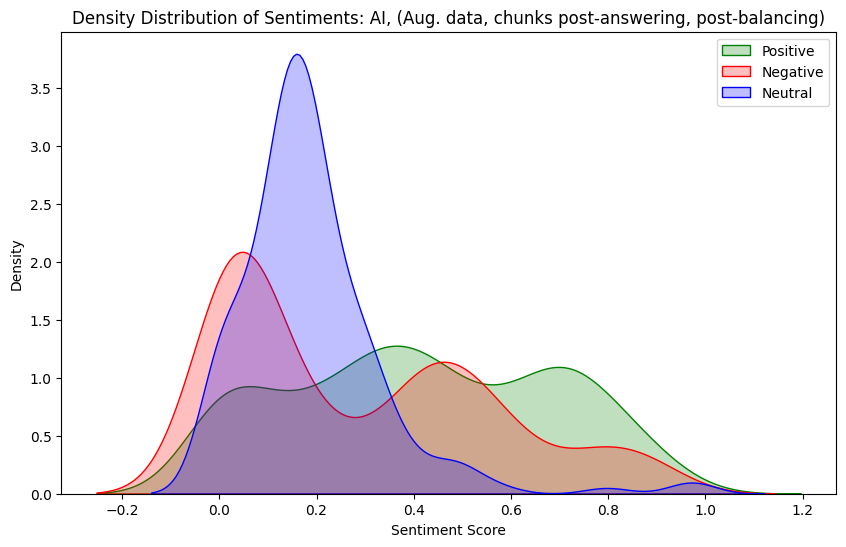

AI_label
AI_POS    144
AI_NEU    104
AI_NEG     97
Name: count, dtype: int64


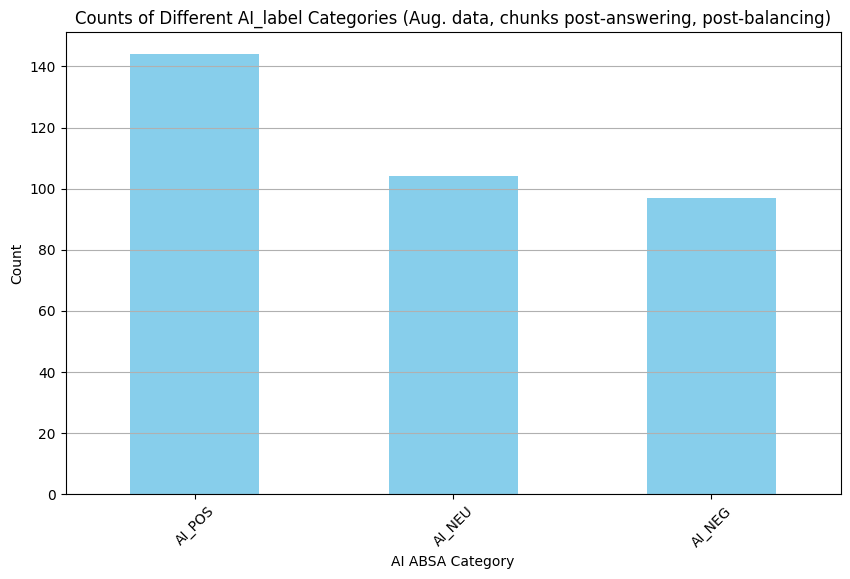

,index,Q_subcat,topical,query,LLMRAG_response,LLM_response,variable,value,full_node,AI_POS,AI_NEU,AI_NEG,AI_label
0,0,ambiguous,College and new technologies,How might AI influence traditional manufacturi...,"\nBased on the context, AI can influence tradi...",A: 1. Increased Efficiency: AI-powered machine...,node_0,Node ID: c6e83947-58e8-4e76-877c-033192134461\...,"“You don’t teach these devices all the rules, ...",0.746152,0.204095,0.049752,AI_POS
1,1,positive,College and new technologies,How might AI positively influence traditional ...,"\nBased on the context, AI can positively infl...",1. Increased Efficiency: AI-powered machines c...,node_0,Node ID: c6e83947-58e8-4e76-877c-033192134461\...,"“You don’t teach these devices all the rules, ...",0.746152,0.204095,0.049752,AI_POS
2,2,negative,College and new technologies,How might AI negatively influence traditional ...,"\nBased on the context, AI has the potential t...",1. Job displacement: AI may replace low-skille...,node_0,Node ID: 6a1edf3e-f00b-48d8-85bb-09df5c805230\...,Automation through AI will increase productivi...,0.440705,0.204905,0.354390,AI_NEU
3,3,ambiguous,Medical diagnostics,What impact might AI have on medical diagnosti...,"\nBased on the context, AI has the potential t...",Artificial Intelligence (AI) has the potential...,node_0,Node ID: 79447286-3d52-41eb-baf1-8ec4464a3297\...,Artificial Intelligence (AI) is moving fast an...,0.463965,0.121780,0.414256,AI_NEU
4,4,positive,Medical diagnostics,How might AI positively influence medical diag...,"\nBased on the context, AI has the potential t...",1. Faster and Accurate Diagnoses: AI algorithm...,node_0,Node ID: 79447286-3d52-41eb-baf1-8ec4464a3297\...,Artificial Intelligence (AI) is moving fast an...,0.463965,0.121780,0.414256,AI_NEU
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,340,positive,Neuroscience,How might AI positively impact neuroscience?,"\nBased on the context, AI has the potential t...",A: AI has the potential to significantly posit...,node_4,Node ID: 8ec63eb9-5e3b-4893-8e86-b43c2d6698de\...,"Instead, AI is now being used more often to bo...",0.701917,0.204513,0.093569,AI_POS
341,341,negative,Neuroscience,How might AI negatively impact neuroscience?,"\nBased on the context, AI has the potential t...",Neuroscience is the scientific study of the br...,node_4,Node ID: 173b16fa-14ba-44ec-9682-606b1e8b5f38\...,And if you know someone caught up in the crimi...,0.058919,0.050168,0.890913,AI_NEG
342,342,ambiguous,Materials,How might AI impact material science?,"\nBased on the context, AI is already having a...",Material science is a vast field with numerous...,node_4,Node ID: e6da471e-e4f6-40e8-aac1-d0bf21e6599c\...,"', 'Tip of the iceberg', 'To test the system’s...",0.774247,0.183793,0.041960,AI_POS
343,343,positive,Materials,How might AI positively impact material science?,"\nBased on the context, AI has the potential t...",1. Improved Material Properties: AI can help i...,node_4,Node ID: 4b0f2c4e-87bb-4530-b681-1c3635bf821c\...,For engineers developing new materials or prot...,0.680611,0.244882,0.074506,AI_POS


In [29]:
path_to_root = '/work/PernilleHøjlundBrams#8577/NLP_2023_P'

import pandas as pd 
#merged_df_subset = pd.read_csv(f"{path_to_root}/data/answers/full_aug/df_aug_prelim_answers_SNF_prompt4_with_nodes.csv").drop(columns = 'Unnamed: 0')

# loading in klaras version instead
merged_df_subset = pd.read_csv(f"{path_to_root}/data/answers/27dec/S_non_factoid_fullnodes_long.csv").drop(columns = ['Unnamed: 0'])
merged_df_subset =merged_df_subset.drop_duplicates()
merged_df_subset= merged_df_subset.reset_index()
merged_df_subset = merged_df_subset.drop(columns = ['index'])

# Run absa on nodes and save them
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F
from transformers import pipeline

# LOAD 1: (Aspect-Based Sentiment Analysis = ABSA) # 0 to 1, indicating level of confidence for each sentiment
absa_tokenizer = AutoTokenizer.from_pretrained("yangheng/deberta-v3-base-absa-v1.1")
absa_model = AutoModelForSequenceClassification \
  .from_pretrained("yangheng/deberta-v3-base-absa-v1.1")

# FUNCTION --------------- Get scores on for aspects
import torch
from torch.nn.functional import softmax
def run_absa_for_dataframe(df, aspects):
    for aspect in aspects:
        # Check if the columns already exist
        if not all(x in df.columns for x in [f'{aspect}_POS', f'{aspect}_NEU', f'{aspect}_NEG']):
            # Create a column for each aspect and sentiment if not exist
            df[f'{aspect}_POS'] = 0.0
            df[f'{aspect}_NEU'] = 0.0
            df[f'{aspect}_NEG'] = 0.0
            
            # Use iterrows() to iterate over DataFrame rows
            for index, row in df.iterrows():
                sentence = row['full_node']
                if pd.isna(sentence):
                    continue  # Skip rows where 'body' is NaN

                # Tokenize and predict sentiment
                inputs = absa_tokenizer(f"[CLS] {sentence} [SEP] {aspect} [SEP]", return_tensors="pt")
                with torch.no_grad():  # Disable gradient calculation
                    outputs = absa_model(**inputs)

                # Calculate probabilities
                probs = softmax(outputs.logits, dim=1).numpy()[0]

                # Assign the probabilities to the correct columns
                df.at[index, f'{aspect}_NEG'] = probs[0]
                df.at[index, f'{aspect}_NEU'] = probs[1]
                df.at[index, f'{aspect}_POS'] = probs[2]
        else:
            print(f"Columns for aspect '{aspect}' already exist. Skipping ABSA for this aspect.")

    return df
# FUNCTION END --------------- 

# Run function
aspects = ['AI']
           
merged_df_subset_absa = run_absa_for_dataframe(merged_df_subset, aspects)
print("Done with ABSA.")

# --- PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns

def plot_density_distributions(pos_list, neg_list, neu_list):
    plt.figure(figsize=(10, 6))

    sns.kdeplot(pos_list, shade=True, color="g", label="Positive")
    sns.kdeplot(neg_list, shade=True, color="r", label="Negative")
    sns.kdeplot(neu_list, shade=True, color="b", label="Neutral")

    plt.title(f"Density Distribution of Sentiments: {aspect}, (Aug. data, chunks post-answering, post-balancing)")
    plt.xlabel("Sentiment Score")
    plt.ylabel("Density")
    plt.legend()

    plt.show()

# Drop duplicates and other NA rows
merged_df_subset_absa = merged_df_subset_absa.drop_duplicates()
merged_df_subset_absa = merged_df_subset_absa.reset_index()

# PLOT
for aspect in aspects:
    plot_density_distributions(pos_list = merged_df_subset_absa[f'{aspect}_POS'],
                               neg_list = merged_df_subset_absa[f'{aspect}_NEG'],
                               neu_list = merged_df_subset_absa[f'{aspect}_NEU'])  

# -- CATEGORICAL PLOT
def find_max_label_with_combined_conditions(row):
    # Check if both AI_POS and AI_NEG are below 0.5
    if row['AI_POS'] <= 0.5 and row['AI_NEG'] <= 0.5:
        # If they are also within 0.2 of each other, assign 'AI_NEU'
        if abs(row['AI_POS'] - row['AI_NEG']) <= 0.1:
            return 'AI_NEU'
        else:
            # Otherwise, use the highest score
            scores = {'AI_POS': row['AI_POS'], 'AI_NEU': row['AI_NEU'], 'AI_NEG': row['AI_NEG']}
            max_label = max(scores, key=scores.get)
            return max_label
    else:
        # If either is above 0.5, use the highest score
        scores = {'AI_POS': row['AI_POS'], 'AI_NEU': row['AI_NEU'], 'AI_NEG': row['AI_NEG']}
        max_label = max(scores, key=scores.get)
        return max_label


# Apply the function to each row to create the 'AI_label' column
merged_df_subset_absa['AI_label'] = merged_df_subset_absa.apply(find_max_label_with_combined_conditions, axis=1)

# Count the occurrences of each category
category_counts_absaai = merged_df_subset_absa['AI_label'].value_counts()

# Print the counts
print(category_counts_absaai)

# Plotting
plt.figure(figsize=(10, 6))
category_counts_absaai.plot(kind='bar', color='skyblue')
plt.title('Counts of Different AI_label Categories (Aug. data, chunks post-answering, post-balancing)')
plt.xlabel('AI ABSA Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

merged_df_subset_absa

In [30]:
#merged_df_subset_absa.to_csv(f"{path_to_root}/data/answers/27dec/with_absa/answers_S_non_factoid_w_absa.csv")

# Plots

In [6]:
import pandas as pd

# Articles aug with ABSA scores
articles_aug_absa = pd.read_csv(f"{path_to_root}/data/answers/full_aug/df_aug_prelim_answers_SNF_prompt4_with_nodes_with_absa.csv")
articles_aug_absa 

# Simu data with ABSA scores
simu_absa = pd.read_csv(f"{path_to_root}/data/simulated/answers_simu_long_merged_nodes_with_absa.csv")
simu_absa

,Unnamed: 0.1,index,Unnamed: 0,Q_subcat,Query,LLMRAG_response,node_number,node_content,extracted_text,node_id_from_nodes,metadata_from_nodes,article_body_from_nodes,AI_POS,AI_NEU,AI_NEG,AI_label
0,0,0,0,comparison,What are the differing views on the impact of ...,"\nBased on the context, there are differing vi...",node_0,Node ID: 84d6f2bb-cb7f-4e33-a41c-ec2631e7bc84 ...,Intensity builds around the integration of Art...,"('id_', '84d6f2bb-cb7f-4e33-a41c-ec2631e7bc84')","('metadata', {'title': 'AI in Fitness and Well...","('text', ""Intensity builds around the integrat...",0.257355,0.191526,0.551119,AI_NEG
1,1,1,1,ambiguous,What impact may AI have on fitness and wellness?,"\nBased on the context, AI has the potential t...",node_0,Node ID: d8dc52b3-bf77-4e6b-af30-9d6d890db083 ...,"In recent years, artificial intelligence (AI) ...","('id_', 'd8dc52b3-bf77-4e6b-af30-9d6d890db083')","('metadata', {'title': 'AI in Fitness and Well...","('text', ""In recent years, artificial intellig...",0.351594,0.365642,0.282764,AI_NEU
2,2,2,2,positive,How can AI positively influence fitness and we...,"\nBased on the context, AI can positively infl...",node_0,Node ID: 070dfabd-bbb3-41a7-9eb2-ad305652840c ...,In a fortunate turn of events for fitness enth...,"('id_', '070dfabd-bbb3-41a7-9eb2-ad305652840c')","('metadata', {'title': 'AI Revolutionizes Fitn...","('text', ""In a fortunate turn of events for fi...",0.958793,0.035015,0.006192,AI_POS
3,3,3,3,negative,How can AI negatively influence fitness and we...,"\nBased on the context, AI can negatively infl...",node_0,Node ID: d8dc52b3-bf77-4e6b-af30-9d6d890db083 ...,"In recent years, artificial intelligence (AI) ...","('id_', 'd8dc52b3-bf77-4e6b-af30-9d6d890db083')","('metadata', {'title': 'AI in Fitness and Well...","('text', ""In recent years, artificial intellig...",0.351594,0.365642,0.282764,AI_NEU
4,4,4,4,comparison,What are the differing views on the impact of ...,"\nBased on the context, there are several diff...",node_0,Node ID: c2fb5b4b-d3f4-4f2b-9883-85c1c6e7f197 ...,As the agriculture industry continues to witne...,"('id_', 'c2fb5b4b-d3f4-4f2b-9883-85c1c6e7f197')","('metadata', {'title': 'Concerns Grow Over the...","('text', 'As the agriculture industry continue...",0.347415,0.154931,0.497654,AI_NEG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,1550,1550,1575,negative,How can AI negatively influence hydrology?,"\nBased on the context, AI can negatively infl...",node_4,Node ID: 7f791859-5fb9-4ac2-9edb-e1a68a80af6e ...,"In a rapidly evolving digital era, the buzzwor...","('id_', '7f791859-5fb9-4ac2-9edb-e1a68a80af6e')","('metadata', {'title': ""Concerns Arise Over AI...","('text', ""In a rapidly evolving digital era, t...",0.308578,0.264284,0.427138,AI_NEG
1551,1551,1551,1576,comparison,What are the differing views on the impact of ...,"\nBased on the context, there are several diff...",node_4,Node ID: ec107606-e289-4edb-b044-1806fe108f21 ...,Innovation in the field of robotics has led to...,"('id_', 'ec107606-e289-4edb-b044-1806fe108f21')","('metadata', {'title': 'Artificial Intelligenc...","('text', 'Innovation in the field of robotics ...",0.354493,0.199124,0.446383,AI_NEU
1552,1552,1552,1577,ambiguous,What impact may AI have on robotics?,"\nBased on the context, the integration of Art...",node_4,Node ID: ab03c673-ccc7-4461-b653-c619d4e35145 ...,In a world where innovation and technological ...,"('id_', 'ab03c673-ccc7-4461-b653-c619d4e35145')","('metadata', {'title': 'Artificial Intelligenc...","('text', ""In a world where innovation and tech...",0.294051,0.196520,0.509428,AI_NEG
1553,1553,1553,1578,positive,How can AI positively influence robotics?,"\nBased on the context, AI can positively infl...",node_4,Node ID: c7362a9d-502a-4044-a662-4b2c373c1483 ...,Artificial Intelligence (AI) continues to revo...,"('id_', 'c7362a9d-502a-4044-a662-4b2c373c1483')","('metadata', {'title': 'AI in Robotics: Advanc...","('text', 'Artificial Intelligence (AI) continu...",0.747

In [ ]:
# Plot functions

# ----------------------- 1 Regular Density

# --- PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns

def plot_density_distributions(pos_list, neg_list, neu_list):
    plt.figure(figsize=(10, 6))

    sns.kdeplot(pos_list, shade=True, color="g", label="Positive")
    sns.kdeplot(neg_list, shade=True, color="r", label="Negative")
    sns.kdeplot(neu_list, shade=True, color="b", label="Neutral")

    plt.title(f"Density Distribution of Sentiments: {aspect}, (chunks, post-answering)")
    plt.xlabel("Sentiment Score")
    plt.ylabel("Density")
    plt.legend()

    plt.show()

# Usage:
# for aspect in aspects:
#     plot_density_distributions(pos_list = df[f'{aspect}_POS'],
#                                neg_list = df[f'{aspect}_NEG'],
#                                neu_list = df[f'{aspect}_NEU'])  

# ----------------------- 2 Categorical counts
# def find_max_label_with_combined_conditions(row):
#     # Check if both AI_POS and AI_NEG are below 0.5
#     if row['AI_POS'] <= 0.5 and row['AI_NEG'] <= 0.5:
#         # If they are also within 0.2 of each other, assign 'AI_NEU'
#         if abs(row['AI_POS'] - row['AI_NEG']) <= 0.1:
#             return 'AI_NEU'
#         else:
#             # Otherwise, use the highest score
#             scores = {'AI_POS': row['AI_POS'], 'AI_NEU': row['AI_NEU'], 'AI_NEG': row['AI_NEG']}
#             max_label = max(scores, key=scores.get)
#             return max_label
#     else:
#         # If either is above 0.5, use the highest score
#         scores = {'AI_POS': row['AI_POS'], 'AI_NEU': row['AI_NEU'], 'AI_NEG': row['AI_NEG']}
#         max_label = max(scores, key=scores.get)
#         return max_label

# USAGE:
# # Apply the function to each row to create the 'AI_label' column
# df['AI_label'] = df.apply(find_max_label_with_combined_conditions, axis=1)

# # Count the occurrences of each category
# category_counts_absaai = df['AI_label'].value_counts()

# # Print the counts
# print(category_counts_absaai)

def categorical_counts(df):
    
    category_counts_absaai = df['AI_label'].value_counts()
    
    # Plotting
    plt.figure(figsize=(10, 6))
    category_counts_absaai.plot(kind='bar', color='skyblue')
    plt.title('Counts of Different AI_label Categories (Aug. data, chunks post-answering, post-balancing)')
    plt.xlabel('AI ABSA Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

merged_df_subset_absa
# ----------------------- 2 Categorical counts

# The other way
import matplotlib.pyplot as plt
import seaborn as sns

def plot_density_distributions_by_question_type(sentiment, ambi_df, pos_df, neg_df, aspect):
    plt.figure(figsize=(10, 6))

    sns.kdeplot(ambi_df, shade=True, color="grey", label="Ambiguous")
    sns.kdeplot(pos_df, shade=True, color="green", label="Positive")
    sns.kdeplot(neg_df, shade=True, color="red", label="Negative")

    plt.title(f"Density Distribution of {sentiment.capitalize()} Sentiment Across Question Types: {aspect}")
    plt.xlabel(f"{sentiment.capitalize()} Sentiment Score")
    plt.ylabel("Density")
    plt.legend()

    plt.show()

aspects = ['AI']

# merged_df_dropped and aspects are defined
for aspect in aspects:
    # Filter DataFrames based on question type
    ambi_questions = merged_df_subset_absa[merged_df_subset_absa['Q_subcat'].str.contains('ambiguous', na=False)]
    pos_questions = merged_df_subset_absa[merged_df_subset_absa['Q_subcat'].str.contains('positive', na=False)]
    neg_questions = merged_df_subset_absa[merged_df_subset_absa['Q_subcat'].str.contains('negative', na=False)]

    # Plot for each sentiment
    plot_density_distributions_by_question_type('positive', ambi_questions[f'{aspect}_POS'], 
                                                pos_questions[f'{aspect}_POS'], neg_questions[f'{aspect}_POS'], aspect)
    plot_density_distributions_by_question_type('negative', ambi_questions[f'{aspect}_NEG'], 
                                                pos_questions[f'{aspect}_NEG'], neg_questions[f'{aspect}_NEG'], aspect)
    plot_density_distributions_by_question_type('neutral', ambi_questions[f'{aspect}_NEU'], 
                                                pos_questions[f'{aspect}_NEU'], neg_questions[f'{aspect}_NEU'], aspect)


In [34]:
#merged_df_subset_absa.to_csv(f"{path_to_root}/data/answers/full_aug/df_aug_prelim_answers_SNF_prompt4_with_nodes_with_absa.csv")


# Topic modelling of articles_aug

In [18]:
# Get data
import pandas as pd
articles_aug = pd.read_csv(f"{path_to_root}/data/articles_full_aug.csv").drop(columns = ['Unnamed: 0'])

articles_aug

,Published Date,Author,Source,Article Header,Sub_Headings,Article Body,Url
0,"July 7, 2023",Adam Zewe,MIT News Office,Learning the language of molecules to predict ...,This AI system only needs a small amount of da...,Discovering new materials and drugs typically ...,https://news.mit.edu/2023/learning-language-mo...
1,"July 6, 2023",Alex Ouyang,Abdul Latif Jameel Clinic for Machine Learning...,MIT scientists build a system that can generat...,"BioAutoMATED, an open-source, automated machin...",Is it possible to build machine-learning model...,https://news.mit.edu/2023/bioautomated-open-so...
2,"June 30, 2023",Jennifer Michalowski,McGovern Institute for Brain Research,"When computer vision works more like a brain, ...",Training artificial neural networks with data ...,"From cameras to self-driving cars, many of tod...",https://news.mit.edu/2023/when-computer-vision...
3,"June 30, 2023",Mary Beth Gallagher,School of Engineering,Educating national security leaders on artific...,"Experts from MIT’s School of Engineering, Schw...",Understanding artificial intelligence and how ...,https://news.mit.edu/2023/educating-national-s...
4,"June 30, 2023",Adam Zewe,MIT News Office,Researchers teach an AI to write better chart ...,A new dataset can help scientists develop auto...,Chart captions that explain complex trends and...,https://news.mit.edu/2023/researchers-chart-ca...
...,...,...,...,...,...,...,...
1118,"april 22, 2021",Miriam Vogel,Techcrunch,"To ensure inclusivity, the Biden administratio...",NaN,The National Security Commission on Artificial...,https://techcrunch.com/2021/04/22/to-ensure-in...
1119,"july 7, 2021",Natasha Lomas,Techcrunch,"YouTube’s recommender AI still a horror show, ...",NaN,For years YouTube’s video-recommending algorit...,https://techcrunch.com/2021/07/07/youtubes-rec...
1120,"december 14, 2023",Darrel Etherington,Techcrunch,"AI isn’t and won’t soon be evil or even smart,...",NaN,"Artificial intelligence — or rather, the varie...",https://techcrunch.com/2023/12/14/ai-isnt-and-...
1121,"december 14, 2023",Kyle Wiggers,Techcrunch,Distributional wants to develop software to re...,NaN,Companies are increasingly curious about AI an...,https://techcrunch.com/2023/12/14/distribution...


In [22]:
def preprocess_text(text):
        tokens = word_tokenize(text.lower())
        tokens = [lemma.lemmatize(word) for word in tokens if word not in stop_words and word.isalnum()]
        return tokens
custom_stopwords = ['say', 'says', 'said', 'also', 'one', 'two', 'three', 'mit', 'the', '—','ai','make','may','could','like','would','use''videgaray']
stop_words = set(stopwords.words('english')).union(custom_stopwords)
lemma = WordNetLemmatizer()

# Test the function on a single entry
sample_text = articles_aug['Article Body'].iloc[0]
print(preprocess_text(sample_text))


['discovering', 'new', 'material', 'drug', 'typically', 'involves', 'manual', 'process', 'take', 'decade', 'cost', 'million', 'dollar', 'streamline', 'process', 'scientist', 'often', 'use', 'machine', 'learning', 'predict', 'molecular', 'property', 'narrow', 'molecule', 'need', 'synthesize', 'test', 'lab', 'lab', 'developed', 'new', 'unified', 'framework', 'simultaneously', 'predict', 'molecular', 'property', 'generate', 'new', 'molecule', 'much', 'efficiently', 'popular', 'approach', 'teach', 'model', 'predict', 'molecule', 'biological', 'mechanical', 'property', 'researcher', 'must', 'show', 'million', 'labeled', 'molecular', 'structure', 'process', 'known', 'training', 'due', 'expense', 'discovering', 'molecule', 'challenge', 'million', 'structure', 'large', 'training', 'datasets', 'often', 'hard', 'come', 'limit', 'effectiveness', 'approach', 'contrast', 'system', 'created', 'researcher', 'effectively', 'predict', 'molecular', 'property', 'using', 'small', 'amount', 'data', 'system

In [23]:
# --- RUN TOPIC MODELLING
# function needed
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import string
import nltk

def run_topic_modeling(dataframe, text_column, num_topics=30, num_words=10):
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('punkt')

    custom_stopwords = ['say', 'says', 'said', 'also', 'one', 'two', 'three', 'mit', 'the', '—','ai','make','may','could','like','would','use''videgaray']
    stop_words = set(stopwords.words('english')).union(custom_stopwords)
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()

    def preprocess_text(text):
        # Convert to string and check if it's empty or None
        text = str(text)
        if not text or text.isspace():
            return []

        try:
            tokens = word_tokenize(text.lower())
            return [lemma.lemmatize(word) for word in tokens if word not in stop_words and word.isalnum()]
        except Exception as e:
            print(f"Error with text: {text}")
            print(f"Exception: {e}")
            return []

    texts = dataframe[text_column].apply(preprocess_text)
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    dataframe['main_topic'] = [sorted(lda_model[corpus[i]], key=lambda x: x[1], reverse=True)[0][0] for i in range(len(dataframe))]

    top_words_per_topic = lda_model.print_topics(num_topics=num_topics, num_words=num_words)
    for topic in top_words_per_topic:
        print(topic)

    return dataframe, lda_model

articles_aug, lda_model = run_topic_modeling(articles_aug, 'Article Body', num_topics=30, num_words=10)


[nltk_data] Downloading package stopwords to /home/ucloud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ucloud/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/ucloud/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(0, '0.008*"new" + 0.007*"protein" + 0.007*"child" + 0.006*"image" + 0.006*"work" + 0.006*"system" + 0.005*"player" + 0.005*"sound" + 0.005*"science" + 0.005*"material"')
(1, '0.039*"object" + 0.014*"robot" + 0.012*"scene" + 0.010*"model" + 0.009*"researcher" + 0.007*"human" + 0.007*"system" + 0.007*"new" + 0.007*"way" + 0.006*"work"')
(2, '0.013*"network" + 0.011*"system" + 0.010*"researcher" + 0.010*"data" + 0.009*"neural" + 0.009*"brain" + 0.007*"computer" + 0.006*"human" + 0.006*"node" + 0.005*"new"')
(3, '0.011*"intelligence" + 0.010*"takeda" + 0.008*"research" + 0.008*"quest" + 0.008*"learning" + 0.007*"student" + 0.007*"computer" + 0.007*"engineering" + 0.007*"science" + 0.006*"program"')
(4, '0.010*"robot" + 0.006*"patient" + 0.005*"work" + 0.005*"therapy" + 0.005*"company" + 0.005*"professor" + 0.005*"solve" + 0.005*"people" + 0.004*"arm" + 0.004*"team"')
(5, '0.016*"system" + 0.007*"research" + 0.007*"data" + 0.006*"material" + 0.005*"new" + 0.005*"climate" + 0.005*"physic" +